### Objetivo Principal:
Obtener una comprensión profunda, antes de realizar análisis más avanzados o modelado de datos, de los accidentes producidos desde inicios del siglo XX con base en información obtenida del dataset "AccidentesAviones.csv".

<b>PROYECTO INDIVIDUAL Nº2</b>

***
# <b>"Accidentes Aereos"</b>
***

## Autor del Trabajo
* Nombre: Edgar Eduardo Barbero
* Carrera y Cohorte: Data Science, Cohorte 15
* Email: edgar.edu.barbero@gmail.com
* Repositorio del proyecto en Github: EEBarbero/accidentes_aereos (https://github.com/EEBarbero/accidentes_aereos)
***

## Objetivos

### Objetivos Secundarios:
+ Realizar un adecuado proceso en la gestión de datos para su posterior análisis y uso.
 
+ Realizar la exploración y el análisis inicial del conjunto de datos con el objeto de comprender sus características, patrones, tendencias y relaciones, utilizando para ello métodos estadísticos y visualizaciones.

## Gestión Inicial de Datos

### Carga de librerías

from ydata_profiling import ProfileReport
profile = ProfileReport(df_acidentes_aviones, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from warnings import filterwarnings
filterwarnings("ignore")

### Importación de datos desde el archivo "AccidentesAviones.csv" a un Dataframe 

In [3]:
df_AA = pd.read_csv(r"AccidentesAviones.csv")

### Primer contacto con los datos: entendiendo la información

In [4]:
df_AA.sample(5)

Unnamed: 0               fecha HORA declarada  \
3936        3936   December 13, 1994           1834   
1651        1651  September 27, 1957           1130   
4665        4665      March 03, 2008           1600   
1940        1940   February 25, 1962              ?   
4780        4780     August 25, 2010           1300   

                                        Ruta                OperadOR  \
3936             Morrisville, North Carolina          American Eagle   
1651            Bhiwandi, Maharashtra, India       èkoda (India) Ltd   
4665                     Near Bethani, Nepal  United Nations Mission   
1940  Portlamar, Margarita Island, Venezuela                  Avensa   
4780     Bandundu, Congo Democratic Republic                  Filair   

     flight_no                 route                           ac_type  \
3936      3379  Greensboro - Raleigh  British Aerospace Jetstream 3201   
1651         ?       Bombay - Indore                      Let Aero 45S   
4665         ?                     ?                             Mi-17   
1940         ?     Porlamar - Cumana                    Fairchild F-27   
4780         ?   Kinshasa - Bandundu                      Let 410UVP-E   

     registration   cn_ln all_aboard PASAJEROS A BORDO crew_aboard  \
3936       N918AE     918         20                18           2   
1651       VT-DHO   51198          3                 0           3   
4665            ?       ?         10                 7           3   
1940     YV-C-EVH    0012         23                20           3   
4780       9Q-CCN  912608         20                17           3   

     cantidad de fallecidos passenger_fatalities crew_fatalities ground  \
3936                     15                   13               2      0   
1651                      3                    0               3      0   
4665                     10                    7               3      0   
1940                     23                   20               3      0   
4780                     19                   16               3      0   

                                                summary  
3936  The aircraft crashed 4 miles SW of runway 5L w...  
1651  While in it's initial climb, the ferry /positi...  
4665  The helicopter, carrying United Nations person...  
1940  Approximately 10 minutes after takeoff , for a...  
4780  The plane crashed 2km from the airstirp and im...

In [5]:
df_AA.shape

(5008, 18)

In [6]:
df_AA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5007 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

In [7]:
df_AA.describe()

Unnamed: 0
count  5008.000000
mean   2503.500000
std    1445.829404
min       0.000000
25%    1251.750000
50%    2503.500000
75%    3755.250000
max    5007.000000

In [8]:
pd.DataFrame(df_AA.columns)

0
0               Unnamed: 0
1                    fecha
2           HORA declarada
3                     Ruta
4                 OperadOR
5                flight_no
6                    route
7                  ac_type
8             registration
9                    cn_ln
10              all_aboard
11       PASAJEROS A BORDO
12             crew_aboard
13  cantidad de fallecidos
14    passenger_fatalities
15         crew_fatalities
16                  ground
17                 summary

> Se ha recibido un set de datos que contiene 5008 registros en 18 columnas.
> Ante el primer contacto con los datos se observa:
> * La exitencia de una columna con datos anómalos:"Unnamed: 0"
> * En algunas columnas aparece con mayor frecuencia datos conteniendo el caracter "?"
>> Se procede a realizar un mayor análisis sobre ambas cuestiones.

#### Columna Anómala: "Unnamed: 0"

In [9]:
df_AA[df_AA.index != df_AA["Unnamed: 0"]]

Empty DataFrame
Columns: [Unnamed: 0, fecha, HORA declarada, Ruta, OperadOR, flight_no, route, ac_type, registration, cn_ln, all_aboard, PASAJEROS A BORDO, crew_aboard, cantidad de fallecidos, passenger_fatalities, crew_fatalities, ground, summary]
Index: []

> La columna "Unnamed: 0" tiene los mismos valores que el índice, por que se infiere que es resabio de alguna herramienta con la que fue manipulado el dataframe previamente.
> * Se resuelve eliminar la columna antes de continuar con el análisis.

In [10]:
df_AA.drop("Unnamed: 0", axis=1, inplace=True)

#### Valores "?"

##### Cuantificación de la presencia del caracter "?" en cada una de las columnas y su incidencia

###### Cuantificación

In [11]:
columnas = df_AA.columns
pd.DataFrame(["Cantidad de '?' en '"+columna+"': "+str(df_AA[df_AA[columna] == "?"][columna].count()) for columna in columnas]).style.hide().hide(axis=1)

###### Incidencia
Se establecerá para cada columna el porcentaje obtenido de dividir la cantidad de valores iguales a "?" sobre el total de registros.

In [12]:
pd.DataFrame(["Incidencia de '?' en '"+columna+"': "+str(round(df_AA[df_AA[columna] == "?"][columna].count() / df_AA[columna].count() * 100,2))+"%" for columna in columnas]).style.hide().hide(axis=1)

> En algunas columnas el valor más frecuente es "?", lo que hace pensar de que los valores faltantes han sido reemplazados por ese caractér.
>> En analisis posteriores se filtrará este registro a fin de que no distorsione las observaciones

### Determinación de los tipos de datos predominantes
En cada una de las columnas se trabajará con los datos diferentes a "?".

In [13]:
# Creación de un diccionario para almacenar el conteo de tipos de datos por columna
conteo_tipos = {}

# Definición de función para contar tipos de datos en una columna
def contar_tipos(columna):
    tipos = columna.apply(type)
    conteo = tipos.value_counts().to_dict()
    return conteo

# Iteración a través de las columnas y conteo de tipos de datos
for columna in columnas:
    conteo_tipos[columna] = contar_tipos(df_AA[df_AA[columna] != "?"][columna])

# Imprimir el conteo de tipos de datos por columna
for columna, conteo in conteo_tipos.items():
    print(f"Columna '{columna}':")
    for tipo, cantidad in conteo.items():
        print(f"  Tipo {tipo.__name__}: {cantidad} veces")

Columna 'fecha':
  Tipo str: 5008 veces
Columna 'HORA declarada':
  Tipo str: 3504 veces
Columna 'Ruta':
  Tipo str: 5003 veces
Columna 'OperadOR':
  Tipo str: 4998 veces
Columna 'flight_no':
  Tipo str: 1326 veces
Columna 'route':
  Tipo str: 4245 veces
  Tipo float: 1 veces
Columna 'ac_type':
  Tipo str: 4995 veces
Columna 'registration':
  Tipo str: 4736 veces
Columna 'cn_ln':
  Tipo str: 4341 veces
Columna 'all_aboard':
  Tipo str: 4991 veces
Columna 'PASAJEROS A BORDO':
  Tipo str: 4787 veces
Columna 'crew_aboard':
  Tipo str: 4789 veces
Columna 'cantidad de fallecidos':
  Tipo str: 5000 veces
Columna 'passenger_fatalities':
  Tipo str: 4773 veces
Columna 'crew_fatalities':
  Tipo str: 4773 veces
Columna 'ground':
  Tipo str: 4964 veces
Columna 'summary':
  Tipo str: 4949 veces


> Salvo un dato de la columna "route" que es de tipo float, el resto son de tipo strings.
> * Por uniformidad y coherencia en los datos, en este momento, convetiremos todo el dataframe a datos de tipo string.

In [14]:
df_AA = df_AA.astype(str)

## Apreciaciones Generales
> El set de datos tiene 5.008 registros y 18 columnas.

> Cantidad de valores nulos por columna:
>* fecha                        0
>* HORA declarada            1504
>* Ruta                         5
>* OperadOR                    10
>* flight_no                 3682
>* route                      762
>* ac_type                     13
>* registration               272
>* cn_ln                      667
>* all_aboard                  17
>* PASAJEROS A BORDO          221
>* crew_aboard                219
>* cantidad de fallecidos       8
>* passenger_fatalities       235
>* crew_fatalities            235
>* ground                      44
>* summary                     59

> No existen registros duplicados.

## Diccionarios de datos
Ante la necesidad de comprender mejor la información, del análisis intuitivo con origen en el nombre de las columnas y los datos que ellas contienen, complementado con información específica de fuentes de datos públicas relacionadas con la Organización de Aviación Civil Internacional (OACI), quien nos requiriera el presente trabajo.
Algunas de las fuentes consultadas fueron:
* https://data.ntsb.gov/avdata/FileDirectory/DownloadFile?fileID=C%3A%5Cavdata%5Ccodman.pdf
* https://data.ntsb.gov/avdata/FileDirectory/DownloadFile?fileID=C%3A%5Cavdata%5Ceadmspub.pdf
* https://data.ntsb.gov/avdata/FileDirectory/DownloadFile?fileID=C%3A%5Cavdata%5Ceadmspub_legacy.pdf

#### Diccionario de acuerdo al dataframe ingestado con los datos de "AccidentesAviones.csv"
| *Columna* | *Descripción* |
| --- | --- |
| Date | Fecha del accidente (formato Mes Dia, Año) |
| Time | Hora local, en 24 hr (formato hh |mm) |
| Location | Lugar del accidente |
| Operator | Línea aérea u operador de la aeronave |
| Flight | Número de vuelo asignado por el operador de la aeronave |
| Route | Ruta completa o parcial volada antes del accidente |
| Type | Tipo de aeronave |
| Registration | Registro OACI de la aeronave |
| cn/In | Número de construcción o de serie / Número de línea o de fuselaje |
| Total Aboard | Total de personas a bordo |
| Passengers Aboard | Pasajeros a bordo |
| Crew Aboard | Tripulación a bordo |
| Total Fatalities | Total de víctimas mortales |
| Passengers Fatalities | Pasajeros fallecidos |
| Crew Fatalities | Tripulantes fallecidos |
| Ground | Total de muertos en tierra |

#### Normalización del nombre de las columas
> Dado que algunas columnas que tienen nombres en inglésy otras en español, siendo además la mayoría de ellos poco descriptivos, se cambiarán los nombres de las mismas.

In [15]:
df_AA.rename(columns={"fecha": "date", "HORA declarada": "time", "Ruta": "location",
                       "OperadOR": "airline_operator", "flight_no": "flight_number", 
                       "route": "route", "ac_type": "aircraft_type", 
                       "registration": "aircraft_registration", 
                       "cn_ln": "construction_fuselage_number", "all_aboard": "total_aboard", 
                       "PASAJEROS A BORDO": "passengers_aboard", "crew_aboard": "crew_aboard", 
                       "cantidad de fallecidos": "all_fatalities", 
                       "passenger_fatalities": "passengers_fatalities", 
                       "crew_fatalities": "crew_fatalities", "ground": "all_killed_ground", 
                       "summary": "summary"}, inplace=True)


In [16]:
columnas = df_AA.columns
pd.DataFrame([columna for columna in columnas]).style.hide().hide(axis=1)

#### Nuevo diccionario de datos
| *Columna* | *Descripción* |
|--- |--- |
| date | fecha del accidente (formato mes dia, año) |
| time | hora local, en 24 hr (formato hh:mm) |
| location | lugar del accidente |
| airline_operator | línea aérea u operador de la aeronave |
| flight_number | número de vuelo asignado por el operador de la aeronave |
| route | ruta completa o parcial volada antes del accidente (lugar de origen / lugar del accidente) |
| aircraft_type | tipo de aeronave |
| aircraft_registration | registro oaci de la aeronave |
| construction_fuselage_number | número de construcción o de serie / número de línea o de fuselaje |
| total_aboard | total de personas a bordo |
| passengers_aboard | pasajeros a bordo |
| crew_aboard | tripulación a bordo |
| all_fatalities | total de víctimas mortales |
| passengers_fatalities | pasajeros fallecidos |
| crew_fatalities | tripulantes fallecidos |
| all_killed_ground | total de muertos en tierra |
| summary | breve descripción del accidente y causa si se conoce |

## Transformaciones de datos

### Columna "date"
> Los datos de esta columan deben ser cambiados para que responda al formato de nuestro diccionario de datos.

#### Valores Nulos
> Ya determinamos que no había valores nulos como tales, ni tampoco iguales a "?", los que hemos determinado son equivalentes en este set de datos a Valores faltantes.

In [17]:
df_AA["date"].isna().sum()

0

In [18]:
df_AA[df_AA["date"] == "?"]

Empty DataFrame
Columns: [date, time, location, airline_operator, flight_number, route, aircraft_type, aircraft_registration, construction_fuselage_number, total_aboard, passengers_aboard, crew_aboard, all_fatalities, passengers_fatalities, crew_fatalities, all_killed_ground, summary]
Index: []

#### Normalización de Formato

In [19]:
from datetime import datetime

# Crear una función de conversión de fechas
def convertidor_fecha(fecha):
    fecha_recibida = datetime.strptime(fecha, '%B %d, %Y')
    fecha_nueva = fecha_recibida.strftime('%Y-%m-%d')
    return fecha_nueva

# Se aplica la corrección de fechas
df_AA['date'] = df_AA['date'].apply(convertidor_fecha)

#### Cambio de tipos de datos
> Se establecerá esta columna sea del tipo date.

In [20]:
df_AA["date"] = pd.to_datetime(df_AA["date"], errors="coerce")

In [21]:
df_AA["date"].isna().sum()

0

#### Análisis de duplicados

In [22]:
df_AA["date"].duplicated().sum()

431

> <u>ADVENTENCIA</u>: dada la escasa incidencia de los accidentes aéreos no era esperable encontrar tantos valores duplicados en las fechas de los inccidentes, porque salvo en los raros casos de que se trate de una colisión de dos aeronaves, es casi imposible concurran dos siniestros el mismo día.
> Exepción a lo expuesto es el suceso de las Torres Gemelas, en esa fecha "2001-09-11", hay cuatro siniestros correspondientes a los 4 aviones que impactaron en ese ataque terrorista.

In [23]:
df_AA[df_AA["date"] == pd.to_datetime("2001-09-11")]

date  time                   location   airline_operator  \
4345 2001-09-11  0945       Arlington, Virginia.  American Airlines   
4346 2001-09-11  0847    New York City, New York  American Airlines   
4347 2001-09-11  0903    New York City, New York   United Air Lines   
4348 2001-09-11  1003  Shanksville, Pennsylvania   United Air Lines   

     flight_number                          route     aircraft_type  \
4345            77  Washington D.C. - Los Angeles  Boeing B-757-223   
4346            11           Boston - Los Angeles  Boeing 767-223ER   
4347           175           Boston - Los Angeles  Boeing B-767-222   
4348            93         Newark - San Francisco  Boeing B-757-222   

     aircraft_registration construction_fuselage_number total_aboard  \
4345                N644AA                    24602/365           64   
4346                N334AA                    22332/169           92   
4347                N612UA                     21873/41           65   
4348                N591UA                    28142/718           44   

     passengers_aboard crew_aboard all_fatalities passengers_fatalities  \
4345                58           6             64                    58   
4346                81          11             92                    81   
4347                56           9             65                    56   
4348                37           7             44                    37   

     crew_fatalities all_killed_ground  \
4345               6               125   
4346              11              2750   
4347               9              2750   
4348               7                 0   

                                                summary  
4345  The aircraft was hijacked after taking off fro...  
4346  The aircraft was hijacked shortly after it lef...  
4347  The aircraft was hijacked shortly after it lef...  
4348  The aircraft was hijacked after taking off fro...

### Columnna "time"

#### Valores Nulos

Reemplazamos los valores "?" por NaT.

In [24]:
df_AA["time"] = df_AA["time"].replace("?", pd.NaT)

In [25]:
df_AA["time"].isna().sum()

1504

#### Normalización de Formato

In [26]:
df_AA['time'] = df_AA['time'].str.replace(r'(\d{2})(\d{2})', r'\1:\2', regex=True)

In [27]:
# Función para convertir los valores de la columna "time" a tipo datetime.time
def convertir_a_tiempo(time_str):
    try:
        return pd.to_datetime(time_str, format='%H:%M:%S').time()
    except ValueError:
        try:
            # Intenta con un formato alternativo sin segundos
            return pd.to_datetime(time_str, format='%H:%M').time()
        except ValueError:
            return None  # Si no se puede convertir, retorna None

# Aplica la función de conversión a la columna "time"
df_AA['time'] = df_AA['time'].apply(convertir_a_tiempo)

### Columna "location"

#### Valores Nulos
> Se reemplazan los "?" por None.

In [28]:
df_AA["location"] = df_AA["location"].replace("?",None)

In [29]:
df_AA["location"].isna().sum()

5

#### Verificación de la dispersión de los valores de la columna "location"

In [30]:
df_AA["location"].nunique()

4124

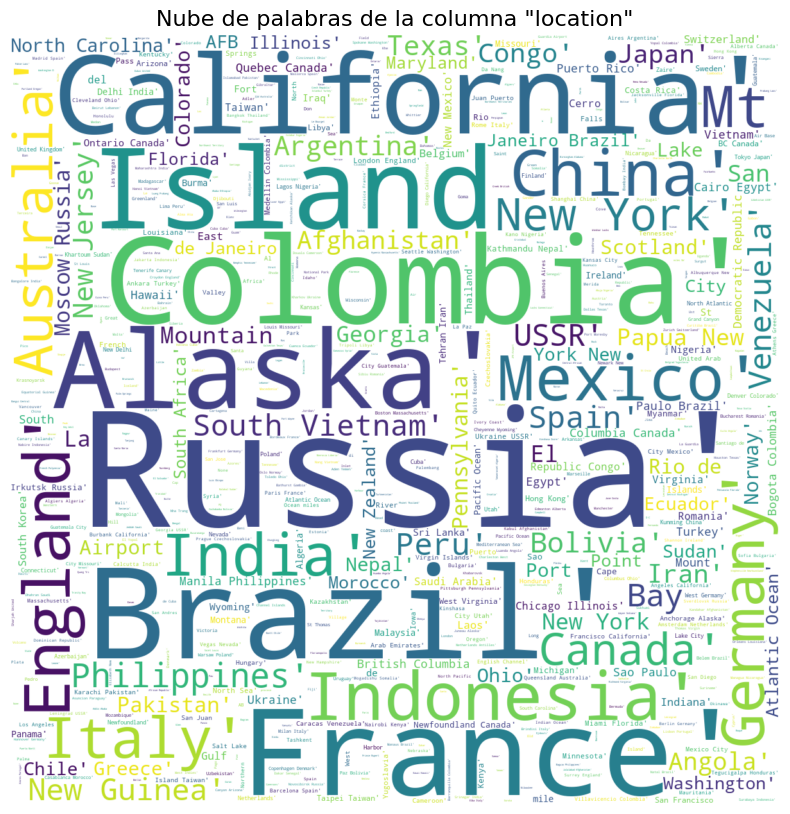

In [31]:

from PIL import Image
from wordcloud import WordCloud, STOPWORDS

palabras = str(df_AA.location.tolist())
mascara = np.array(Image.open('globo_terraqueo.png'))

stopwords = set(STOPWORDS)
stopwords.add('nan')
stopwords.add('Near')

wc = WordCloud(background_color="white", max_words=5008, mask=mascara,
               stopwords=stopwords) 
wc.generate(palabras)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Nube de palabras de la columna "location"', loc='Center', fontsize=16)
plt.show()

### Columna "airline_operator"

##### Valores nulos

In [32]:
df_AA["airline_operator"] = df_AA["airline_operator"].replace("?",None)

In [33]:
df_AA["airline_operator"].isna().sum()

10

### Columna "flight_number"

#### Valores nulos

In [34]:
df_AA["flight_number"] = df_AA["flight_number"].replace("?",None)

In [35]:
df_AA["flight_number"].isna().sum()

3682

### Columna "route"

#### Valores nulos

In [36]:
df_AA["route"] = df_AA["route"].replace("?",None)

In [37]:
df_AA["route"].isna().sum()

762

### Columna "aircraft_type"

#### Valores nulos

In [38]:
df_AA["aircraft_type"] = df_AA["aircraft_type"].replace("?",None)

In [39]:
df_AA["aircraft_type"].isna().sum()

13

### Columna "aircraft_registration"

#### Valores nulos

In [40]:
df_AA["aircraft_registration"] = df_AA["aircraft_registration"].replace("?",None)

In [41]:
df_AA["aircraft_registration"].isna().sum()

272

### Columna "construction_fuselage_number"

#### Valores nulos

In [42]:
df_AA["construction_fuselage_number"] = df_AA["construction_fuselage_number"].replace("?",None)

In [43]:
df_AA["construction_fuselage_number"].isna().sum()

667

### Columna "total_aboard"

#### Valores nulos

In [44]:
df_AA["total_aboard"] = df_AA["total_aboard"].replace("?", np.nan)

In [45]:
df_AA["total_aboard"].isna().sum()

17

### Columna "passengers_aboard"

#### Valores nulos

In [46]:
df_AA["passengers_aboard"] = df_AA["passengers_aboard"].replace("?", np.nan)

In [47]:
df_AA["passengers_aboard"].isna().sum()

221

### Columna "crew_aboard"

#### Valores nulos

In [48]:
df_AA["crew_aboard"] = df_AA["crew_aboard"].replace("?", np.nan)

In [49]:
df_AA["crew_aboard"].isna().sum()

219

### Columna "all_fatalities"

#### Valores nulos

In [50]:
df_AA["all_fatalities"] = df_AA["all_fatalities"].replace("?", np.nan)

In [51]:
df_AA["all_fatalities"].isna().sum()

8

### Columna "passengers_fatalities"

#### Valores nulos

In [52]:
df_AA["passengers_fatalities"] = df_AA["passengers_fatalities"].replace("?", np.nan)

In [53]:
df_AA["passengers_fatalities"].isna().sum()

235

### Columna "crew_fatalities"

#### Valores nulos

In [54]:
df_AA["crew_fatalities"] = df_AA["crew_fatalities"].replace("?", np.nan)

In [55]:
df_AA["crew_fatalities"].isna().sum()

235

### Columna "all_killed_ground"

#### Valores nulos

In [56]:
df_AA["all_killed_ground"] = df_AA["all_killed_ground"].replace("?", np.nan)

In [57]:
df_AA["all_killed_ground"].isna().sum()

44

### Columna "summary"

#### Valores nulos

In [58]:
df_AA["summary"] = df_AA["summary"].replace("?", None)

In [59]:
df_AA["summary"].isna().sum()

59

## Fuentes Externas: Importación de Datos

>>><u>Se utilizan como fuentes de datos externas provenientes de "National Transportation Safety Board".</u>
>>>Desde el enlace https://data.ntsb.gov/avdata/FileDirectory/DownloadFile?fileID=C%3A%5Cavdata%5Cavall.zip se descargó el archivo "avall.mdb", del cual se extrajeron las tablas "Country" y "State que se utilizarán para ingestar datos que enriquecerán a nuestro dataframe.

In [60]:
df_country = pd.read_csv(r"country.csv", sep=";")

In [61]:
df_country.head()

COUNTRY_CODE    COUNTRY_NAME
0          USA   United States
1           AF     Afghanistan
2           AL         Albania
3           AG         Algeria
4           AQ  American Samoa

In [62]:
df_state = pd.read_csv(r"state.csv", sep=";")

In [63]:
df_state.head()

state                            name faa_region
0    AK  ALASKA                                 AL
1    AL  ALABAMA                                SO
2    AR  ARKANSAS                               SW
3    AZ  ARIZONA                                WP
4    CA  CALIFORNIA                             WP

## Creación de Columnas

### Columna "year"

> Resulta conveniente el tipo de datos entero para esta columna, porque si bien no es una columna númerica, en sentido estricto, es una es una variable categórica discreta que representa años y este formato es conveniente para cálculos como el de decenios requeriro en el KPI solicitado.

In [64]:
df_AA["year"] = df_AA["year"] = df_AA["date"].dt.year

In [65]:
df_AA["year"].dtype

dtype('int32')

### Columna "month"

> Por motivos análogos a los brindados para la columna "year", resulta conveniente el tipo de datos entero para esta columna.

In [66]:
df_AA['month'] = df_AA['date'].dt.month

In [67]:
df_AA["month"].dtype

dtype('int32')

### Columna "hour"

> Dado que resulta inchoherente a efectos de los análisís de datos y lo que se proyecta realizar en el dasboard, no tiene coherencia tener minutos en el horario del accidente porque es muy difícil encontrar un patrón. Con esos objetivos es más útil agrupar los eventos por horas sin considerar los minutos.
> Se creará la columna "hour".

In [68]:
def obtener_hora(time_obj):
    if pd.notna(time_obj):  # Verifica que el valor no sea NaN
        try:
            # Convierte el objeto datetime.time a una cadena de texto
            time_str = time_obj.strftime("%H:%M:%S")
            # Divide la cadena en partes separadas por ":"
            partes = time_str.split(":")
            if len(partes) >= 1:
                return partes[0]  # Devuelve la primera parte que corresponde a la hora
            else:
                return np.nan  # Si no hay partes válidas, retorna NaN
        except ValueError:
            return np.nan  # Si no se puede dividir, retorna NaN
    else:
        return np.nan  # Mantener el valor NaN para NaN

# Aplica la función para obtener la hora y crea la columna "hour"
df_AA['hour'] = df_AA['time'].apply(obtener_hora)

In [69]:
df_AA["hour"].dtype

dtype('O')

### Columnas "state_event" y "country_event"
>Tal como documentamos con anterioridad, la columna "location" tiene datos dispersos.
>Además, se observa que en la misma se encuentran mezclados datos de estados, en el caso de que el evento haya sucedido en Estados Unidos, de lo contrario ciudad y país.
>Esto hace que no sea información útil para el análisis y los KPIs, para resuelverlo se procederá a:
>>La información contenida en la columna "location" servirá para crear las columnas "state_event" y "country_event", lo que permitirá ser utilizada en el dashboard reflejando los paises en que sucedieron los accidentes, lo mismo sucede para el caso de los estados cuando los siniestros hayan sucedido en Estados Unidos. También los valores de estos campos podrían ser útiles para crear KPIs, por ejemplo: Disminución de un 0.5% la Tasa Anual de Accidentes Aéreos por País, comparado a el año anterior.

>Prodedimiento operativo:
>1. Crear la columna "state_event"
>1. Crear la columna "country_event"
>1. Para obtener sus valores se realizará el siguiente proceso:
>
>     * Para derrminar si la información de la columna "location" pertenece a un estado, se comparará con la tabla externa importada "State".
>     * En caso de que no se haya encontrado el estado mediante el procedimiento descipto, se comparará el valor del contenido de la columa "location" con la tabla externa importada "Country".

In [70]:
df_state["name"] = df_state["name"].str.strip().str.lower()
df_country["COUNTRY_NAME"] = df_country["COUNTRY_NAME"].str.strip().str.lower()

# Función para obtener estado y país
def get_state_country_info(location):
    if pd.notna(location):  # Verifica que el valor no sea NaN
        words = location.split(',')
        for word in reversed(words):
            word = word.strip().lower()
            if word in df_state['name'].values:
                state_name = df_state[df_state['name'] == word]['name'].values[0]
                return state_name.title(), 'United States'
        
        # Si no se encontró un estado, buscamos el país en df_country
        for word in reversed(words):
            word = word.strip().lower()
            if word in df_country['COUNTRY_NAME'].values:
                country_name = df_country[df_country['COUNTRY_NAME'] == word]['COUNTRY_NAME'].values[0]
                return None, country_name.title()
            else:
                country_name = location
    
    return None, None  # Si no se encontró ni estado ni país, ambos estarán vacíos

# Aplicar la función para obtener las columnas "state_event" y "country_event"
df_AA['state_event'], df_AA['country_event'] = zip(*df_AA['location'].apply(get_state_country_info))

# Mostrar los resultados
print(df_AA[['location', 'state_event', 'country_event']])

                                location state_event  country_event
0                    Fort Myer, Virginia    Virginia  United States
1                Juvisy-sur-Orge, France        None         France
2              Atlantic City, New Jersey  New Jersey  United States
3     Victoria, British Columbia, Canada        None         Canada
4                     Over the North Sea        None           None
...                                  ...         ...            ...
5003                  Near Butte, Alaska      Alaska  United States
5004                Near Kaduna, Nigeria        None        Nigeria
5005          Near Pyin Oo Lwin, Myanmar        None           None
5006          Patikul, Sulu, Philippines        None    Philippines
5007                      Palana, Russia        None         Russia

[5008 rows x 3 columns]


# NUEVO set de Datos
>A partir de las transformaciones realizadas hasta el momento sobre el archivo "AccidentesAviones.csv" e importando sólo las columnas que necesitamos para el dashboard, se crea un nuevo dataframe, que será sobre el que trabajaremos en adelante analizando, describiendo, interviniendo sobre los valores atípicos y en caso de resultar necesario sobre los valores nulos.

## Creamos el nuevo dataframe "df_AA_Depurado"

In [71]:
df_AA_Depurado = df_AA[['year', 'month', 'hour', 'state_event', 'country_event', 'airline_operator', 'route', 'aircraft_type', 'total_aboard', 'passengers_aboard', 'crew_aboard', 'all_fatalities', 'passengers_fatalities', 'crew_fatalities', 'all_killed_ground']]

In [72]:
df_AA_Depurado.sample(5)

year  month hour state_event  country_event          airline_operator  \
2177  1965      9   09      Alaska  United States          Cordova Airlines   
3365  1986      1   08        None      Guatemala  Aerovias de Guatemala SA   
2961  1978      3   12        None        Nigeria           Nigeria Airways   
2447  1969     12   07        None         Russia                  Aeroflot   
144   1928      1  NaN        None          Spain               Aeropostale   

                                             route  \
2177                                          None   
3365                    Guatemala City-Santa Elena   
2961                                  Abuja - Kano   
2447                          Syktyvkar - Khatanga   
144   Casablanca - Alicante - Perpignan - Toulouse   

                             aircraft_type total_aboard passengers_aboard  \
2177                    Aero Commander 680            5                 4   
3365          Sud-Aviation  Caravelle VI-N           94                88   
2961  Fokker F-28 Fellowship 1000 / MiG-21           18                11   
2447                       Antonov An-12PL            8                 2   
144                             Breguet 14            1                 0   

     crew_aboard all_fatalities passengers_fatalities crew_fatalities  \
2177           1              4                     3               1   
3365           6             94                    88               6   
2961           7             18                    11               7   
2447           6              8                     2               6   
144            1              1                     0               1   

     all_killed_ground  
2177                 0  
3365                 0  
2961                 0  
2447                 0  
144                  0

Liberamos memoria y evitamos confusiones eliminando de memoria todos los dataframes, excepto elrecién creado "df_AA_Depurado".

In [73]:
#del df_AA
del df_country
del df_state

## EDA

### Análisis General

In [74]:
df_AA_Depurado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   5008 non-null   int32 
 1   month                  5008 non-null   int32 
 2   hour                   3457 non-null   object
 3   state_event            1019 non-null   object
 4   country_event          4295 non-null   object
 5   airline_operator       4998 non-null   object
 6   route                  4246 non-null   object
 7   aircraft_type          4995 non-null   object
 8   total_aboard           4991 non-null   object
 9   passengers_aboard      4787 non-null   object
 10  crew_aboard            4789 non-null   object
 11  all_fatalities         5000 non-null   object
 12  passengers_fatalities  4773 non-null   object
 13  crew_fatalities        4773 non-null   object
 14  all_killed_ground      4964 non-null   object
dtypes: int32(2), object(1

In [75]:
df_AA_Depurado.shape

(5008, 15)

In [76]:
pd.DataFrame(columnas := df_AA_Depurado.columns).style.hide().hide(axis=1)

>Tenemos un set de datos que contiene 5008 registros en 15 columnas.

### Analisis de Valores Faltantes

In [77]:
pd.DataFrame(df_AA_Depurado.isna().sum()).style.hide(axis=1)

In [78]:
cuadro = pd.DataFrame(((df_AA_Depurado.isna().sum()/df_AA_Depurado.shape[0])*100).round(2))
cuadro.columns = ["% de Valores Nulos"]
cuadro

% de Valores Nulos
year                                 0.00
month                                0.00
hour                                30.97
state_event                         79.65
country_event                       14.24
airline_operator                     0.20
route                               15.22
aircraft_type                        0.26
total_aboard                         0.34
passengers_aboard                    4.41
crew_aboard                          4.37
all_fatalities                       0.16
passengers_fatalities                4.69
crew_fatalities                      4.69
all_killed_ground                    0.88

Text(0.5, 1.0, 'Valores Válidos')

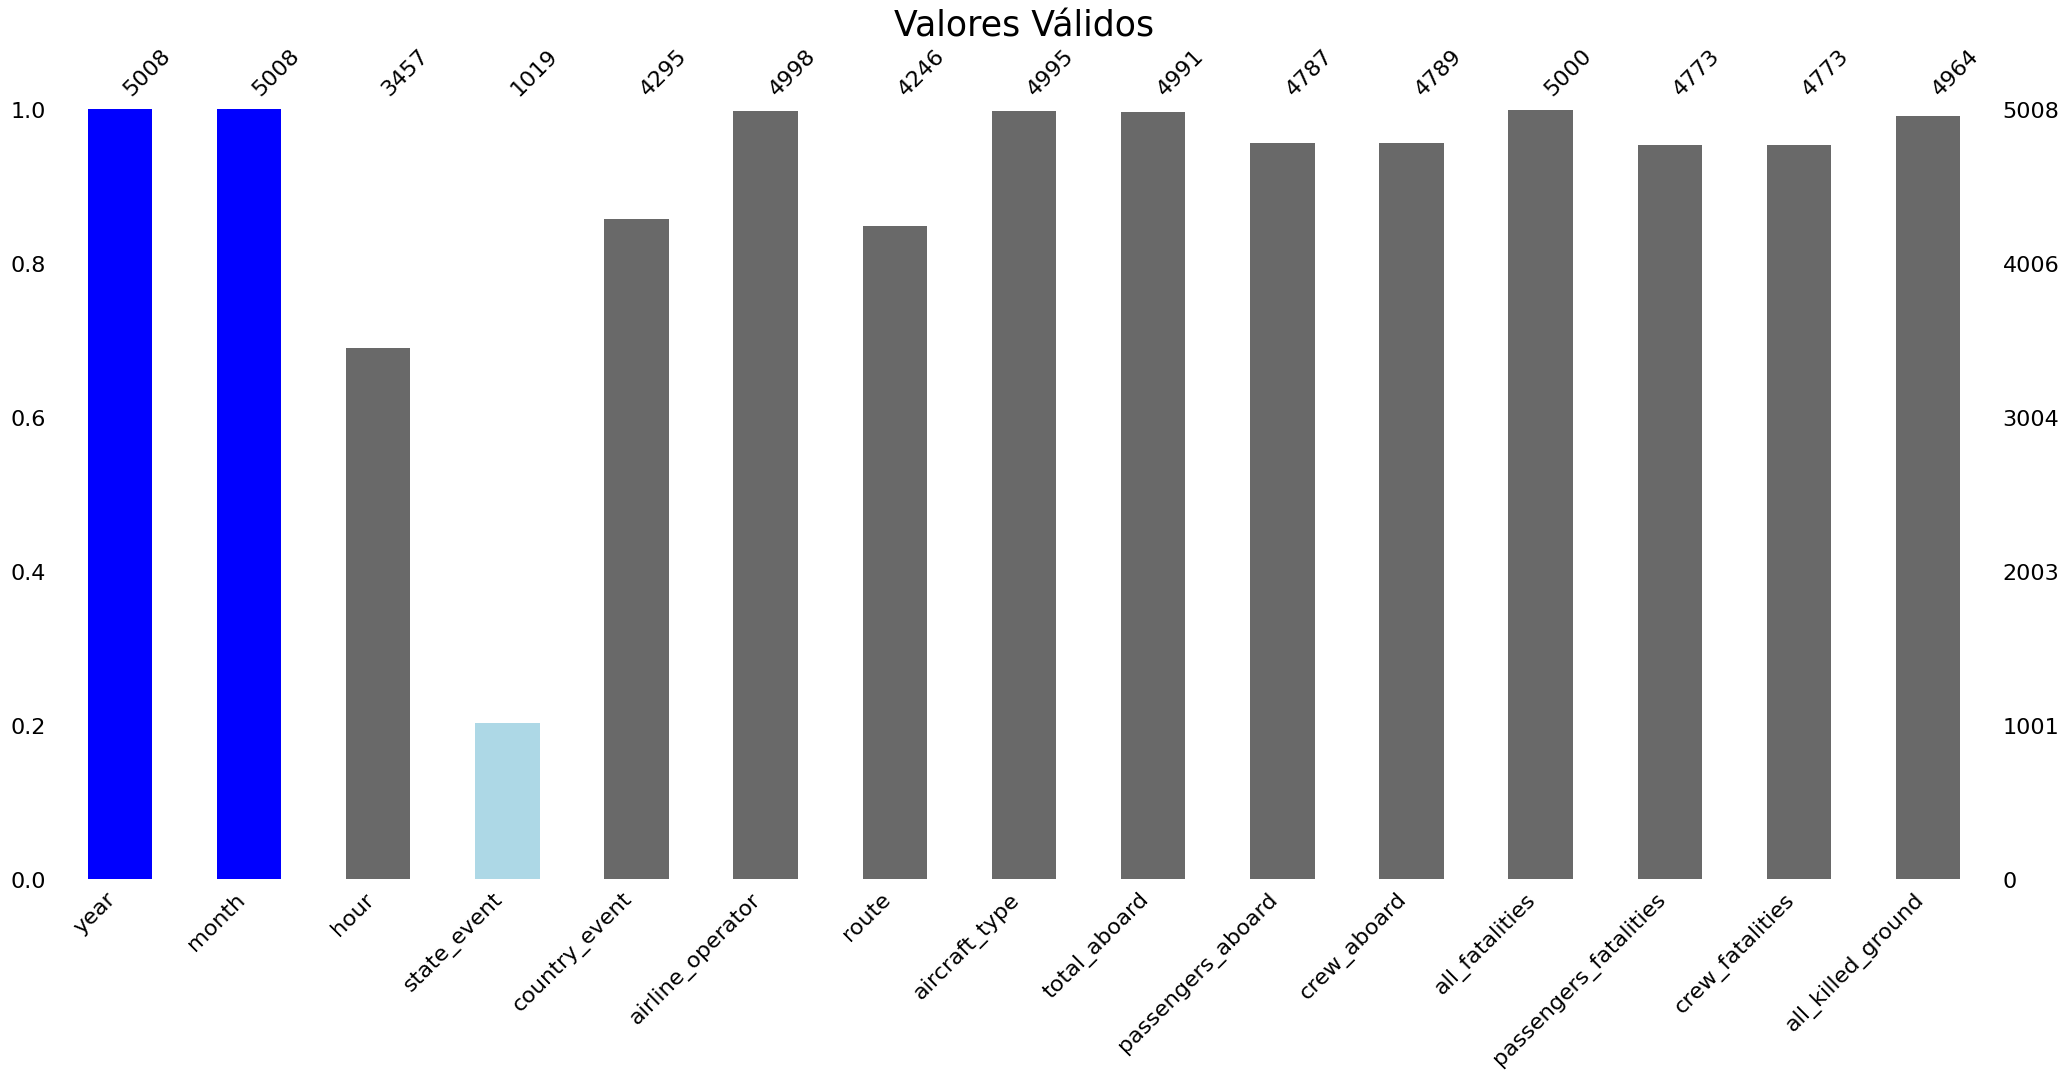

In [79]:
# Se usa missigno para analizar datos perdidos
import missingno
#Se grafica los registros válidos
color =["blue", "blue", "dimgrey", "lightblue", "dimgrey", "dimgrey", "dimgrey", "dimgrey", "dimgrey", "dimgrey", "dimgrey", "dimgrey", "dimgrey", "dimgrey", "dimgrey"]
missingno.bar(df_AA_Depurado, color=color)
plt.title("Valores Válidos", fontsize=25)

>1. Se debe acotar que la amplia cantidad de valores faltantes para la columna "state_event", que alcanza 3989 valores (79,65%) no debe ser considerada completa. Ya que el objetido de esta columna es reflejar únicamente los estados de los siniestros sucedidos en Estados Unidos, careciendo de valores para los eventos ocurridos en el resto de los países. Por lo que no podemos estimar el número real de valores faltantes en esta columna.
>2. Para los únicos campos que no existen valores faltantes es para "year" y "month", ambos derivados del campo "date" del set de datos original ("AccidentesAviones.csv").
>3. Excluyendo a "state_event", la columna con mayor cantidad de valores faltantes es "hour", derivada de la columna "time" en el set original, alcanzado su numero los 1551, que repesenta el 30,97% del total de datos.
>4. Existen en un segundo escalón de faltantes, "country_event" faltan 14,24% (713 casos) de los valores y en "route" el 15,22% (762).
>5. Hay otro grupo en el que los valores faltantes oscilan ente el 4,69% y el 4,37%: "passengers_fatalities" 4,69% (235), "crew_fatalities" 4,69% (235), "passengers_aboard" 4,41% (221) y "crew_aboard" 4,37% (219).
>6. Por último tenemos un grupo de columnas cuyos valores faltantes son de escasa incidencia y se encuentran por debajo del 1%: all_killed_ground 0,88% (44), total_aboard 0,34% (17), aircraft_type	0,26% (13), airline_operator 0.20% (10) y all_fatalities 0,16% (8).

### Registros Duplicados

In [80]:
df_AA_Depurado.duplicated().sum()

0

>No se encuentran registros duplicados, por lo que no hay acciones a este respecto.

### Análisis de cada distribución de variables categóricas

#### Columna "year"

In [81]:

def columna_a_enteros(columna):
    try:
        df_AA_Depurado[columna] = df_AA_Depurado[columna].astype(int)
    except ValueError:
        df_AA_Depurado[columna] = df_AA_Depurado[columna].apply(lambda x: int(x) if str(x).isdigit() else None)
    return   

In [82]:
def analisis_distribución(columna, titulo):
    valores = columna.unique()
    col1 = columna.value_counts()
    porcentaje = 100*columna.value_counts(normalize=True)

    porcentaje = 100*columna.value_counts(normalize=True)
    return pd.DataFrame({titulo:col1, "Porcentaje":porcentaje.round(2)})

In [83]:
import plotly.express as px
def histograma(columna, titulo):
    fig = px.histogram(df_AA_Depurado, x=columna,title=titulo)
    fig.update_layout(bargap=0.1)
    return fig

In [84]:
columna= "year"
columna_a_enteros(columna)

In [85]:
pd.options.display.max_rows
pd.options.display.max_columns
titulo = "Cantidad"
analisis = analisis_distribución(df_AA_Depurado[columna],titulo)

In [86]:
analisis.Cantidad.count()

111

In [87]:
analisis.head(10)

Cantidad  Porcentaje
year                      
1946        88        1.76
1989        83        1.66
1947        82        1.64
1948        78        1.56
1962        78        1.56
1972        77        1.54
1945        75        1.50
1951        75        1.50
1994        74        1.48
1970        73        1.46

>La columna "year" contiene una variable categorica discreta con una elevada dispersión ya que tenemos 111 valores diferentes y los porcentajes mayores no alcanzan al 1.8%  de los valores.

In [88]:
titulo ="Distribución de 'year'"
histograma(columna, titulo).show()

### Columna "month"

In [89]:
columna= "month"
columna_a_enteros(columna)

In [90]:
pd.options.display.max_rows
pd.options.display.max_columns
titulo = "Cantidad"
analisis = analisis_distribución(df_AA_Depurado[columna],titulo)

In [91]:
analisis.Cantidad.count()

12

In [92]:
analisis

Cantidad  Porcentaje
month                      
12          496        9.90
1           460        9.19
9           451        9.01
8           451        9.01
11          439        8.77
10          427        8.53
3           426        8.51
7           425        8.49
6           366        7.31
2           360        7.19
5           359        7.17
4           348        6.95

In [93]:
titulo ="Distribución de 'month'"
histograma(columna, titulo).show()

### Columna "hour"

In [94]:
columna= "hour"
columna_a_enteros(columna)

In [95]:
pd.options.display.max_rows
pd.options.display.max_columns
titulo = "Cantidad"
analisis_distribución(df_AA_Depurado[columna],titulo)

Cantidad  Porcentaje
hour                      
11.0       208        6.02
9.0        203        5.87
14.0       201        5.81
15.0       200        5.79
10.0       197        5.70
19.0       194        5.61
16.0       183        5.29
13.0       181        5.24
8.0        179        5.18
12.0       178        5.15
17.0       176        5.09
18.0       162        4.69
20.0       156        4.51
7.0        155        4.48
22.0       122        3.53
23.0       119        3.44
21.0       105        3.04
6.0         96        2.78
1.0         84        2.43
4.0         83        2.40
2.0         79        2.29
0.0         74        2.14
5.0         61        1.76
3.0         61        1.76

In [96]:
analisis.Cantidad.count()

12

In [97]:
titulo ="Distribución de 'year'"
histograma(columna, titulo).show()

### Columna "state_event"

In [98]:
pd.options.display.max_rows
pd.options.display.max_columns
columna= "state_event"
titulo = "Cantidad"
analisis = analisis_distribución(df_AA_Depurado[columna],titulo)

In [99]:
analisis.Cantidad.count()

49

In [100]:
analisis.head(10)

Cantidad  Porcentaje
state_event                       
California         116       11.38
Alaska             104       10.21
New York            57        5.59
Texas               48        4.71
Ohio                43        4.22
New Jersey          37        3.63
Florida             36        3.53
Illinois            35        3.43
Washington          33        3.24
Pennsylvania        32        3.14

In [101]:
titulo ="Distribución de 'state_event'"
histograma(columna, titulo).show()

### Columna "country_event"

In [102]:
pd.options.display.max_rows
pd.options.display.max_columns
columna= "country_event"
titulo = "Cantidad"
analisis = analisis_distribución(df_AA_Depurado[columna],titulo)

In [103]:
analisis.Cantidad.count()

176

In [104]:
analisis.head(10)

Cantidad  Porcentaje
country_event                      
United States      1020       23.75
Russia              254        5.91
Brazil              175        4.07
Colombia            151        3.52
Canada              129        3.00
France              125        2.91
India               104        2.42
Indonesia            99        2.31
China                94        2.19
Italy                86        2.00

In [105]:
titulo ="Distribución de 'country_event'"
histograma(columna, titulo).show()

### Columna "airline_operator"

In [106]:
pd.options.display.max_rows
pd.options.display.max_columns
columna= "airline_operator"
titulo = "Cantidad"
análisis = analisis_distribución(df_AA_Depurado[columna],titulo)

In [107]:
analisis.Cantidad.count()

176

In [108]:
analisis.head(10)

Cantidad  Porcentaje
country_event                      
United States      1020       23.75
Russia              254        5.91
Brazil              175        4.07
Colombia            151        3.52
Canada              129        3.00
France              125        2.91
India               104        2.42
Indonesia            99        2.31
China                94        2.19
Italy                86        2.00

In [109]:
titulo ="Distribución de 'airline_operator'"
histograma(columna, titulo).show()

### Columna "route"

In [110]:
pd.options.display.max_rows
pd.options.display.max_columns
columna= "route"
titulo = "Cantidad"
analisis = analisis_distribución(df_AA_Depurado[columna],titulo)

In [111]:
analisis.Cantidad.count()

3838

In [112]:
analisis.head(10)

Cantidad  Porcentaje
route                                           
Training                          96        2.26
Sightseeing                       31        0.73
Test flight                       23        0.54
Sao Paulo - Rio de Janeiro         7        0.16
Test                               6        0.14
Rio de Janeiro - Sao Paulo         5        0.12
Huambo - Luanda                    4        0.09
Paris - London                     4        0.09
Barranquilla - Bogota              4        0.09
Croydon - Paris                    4        0.09

In [113]:
titulo ="Distribución de 'route'"
histograma(columna, titulo).show()

### Columna "aircraft_type"

In [114]:
pd.options.display.max_rows
pd.options.display.max_columns
columna= "aircraft_type"
titulo = "Cantidad"
analisis = analisis_distribución(df_AA_Depurado[columna],titulo)

In [115]:
analisis.Cantidad.count()

2468

In [116]:
analisis.head(10)

Cantidad  Porcentaje
aircraft_type                                                 
Douglas DC-3                                   333        6.67
de Havilland Canada DHC-6 Twin Otter 300        81        1.62
Douglas C-47A                                   70        1.40
Douglas C-47                                    64        1.28
Douglas DC-4                                    41        0.82
Yakovlev YAK-40                                 35        0.70
Antonov AN-26                                   35        0.70
Junkers JU-52/3m                                30        0.60
Douglas C-47B                                   27        0.54
Douglas DC-6B                                   27        0.54

In [117]:
titulo ="Distribución de 'aircraft_type'"
histograma(columna, titulo).show()

### Valores Atípicos

#### Columna "total_aboard"

In [118]:
def grafico_dispersión(columna):
    sns.scatterplot(data=df_AA_Depurado, x=df_AA_Depurado.index, y=columna)
    plt.show()
    return

In [119]:
def grafico_violin(columna):
    plt.figure(figsize=(15, 10))  # Establece el tamaño del gráfico (opcional)
    sns.violinplot(data=df_AA_Depurado, y=columna, inner="quart")
    plt.ylabel(columna)
    plt.title('Gráfico de Violín de la Variable "'+columna+'"')
    return plt

In [120]:
columna= "total_aboard"
columna_a_enteros(columna)

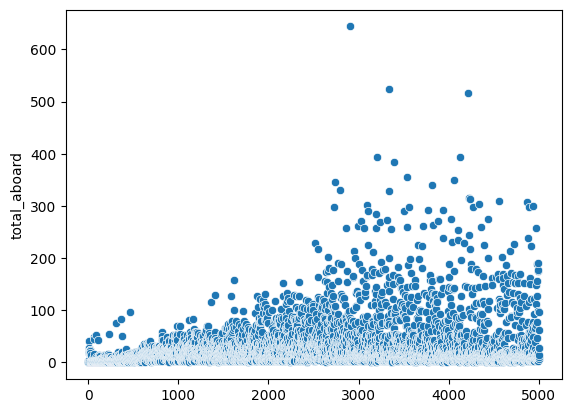

In [121]:
grafico_dispersión(columna)

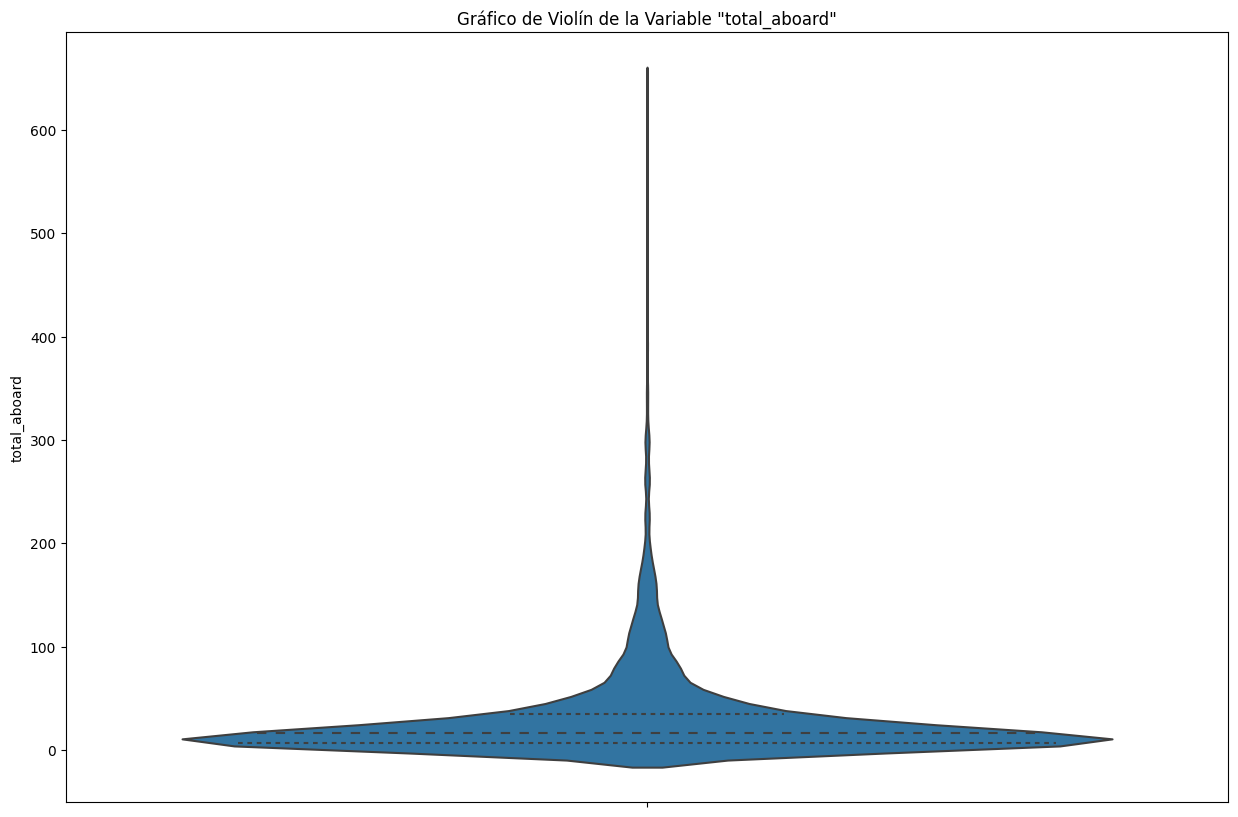

In [122]:
grafico_violin(columna).show()

In [123]:
df_AA_Depurado[df_AA_Depurado[columna] > 400]

year  month  hour state_event country_event  \
2902  1977      3  17.0        None          None   
3341  1985      8  18.0        None         Japan   
4219  1999      7  11.0        None         Japan   

                      airline_operator  \
2902  Pan American World Airways / KLM   
3341                   Japan Air Lines   
4219                All Nippon Airways   

                                              route  \
2902  Tenerife - Las Palmas / Tenerife - Las Palmas   
3341                                  Tokyo - Osaka   
4219                  Tokyo, Japan - Chitose, Japan   

                             aircraft_type  total_aboard passengers_aboard  \
2902  Boeing B-747-121 / Boeing B-747-206B         644.0               614   
3341                     Boeing B-747-SR46         524.0               509   
4219                          Boeing B-747         517.0               503   

     crew_aboard all_fatalities passengers_fatalities crew_fatalities  \
2902          30            583                   560              23   
3341          15            520                   505              15   
4219          14              1                     0               1   

     all_killed_ground  
2902                 0  
3341                 0  
4219                 0

>Si bien las versiones típicas de Boeing 747, no poseen capacidades tan elavadas de pasajeros, estos números podría estar relacionados con configuraciones muy específicas de una aerolínea o una versión modificada del avión para un propósito particular. Careciendo de otros datos se toma la información de origen como válida y no los podemos considerar como valores atípicos.

In [124]:
df_AA_Depurado[columna].describe()

count    4991.000000
mean       31.121218
std        45.479965
min         0.000000
25%         7.000000
50%        16.000000
75%        35.000000
max       644.000000
Name: total_aboard, dtype: float64

#### Columna "passengers_aboard"

In [125]:
columna= "passengers_aboard"
columna_a_enteros(columna)

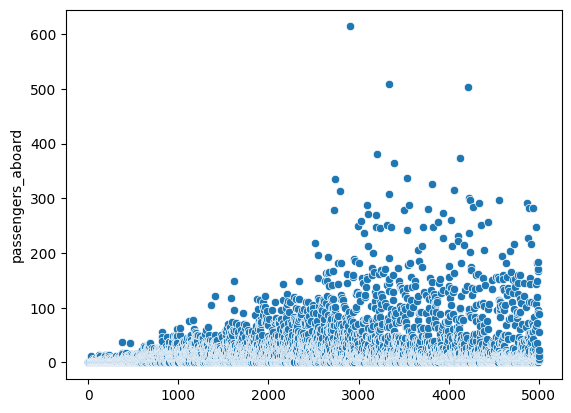

In [126]:
grafico_dispersión(columna)

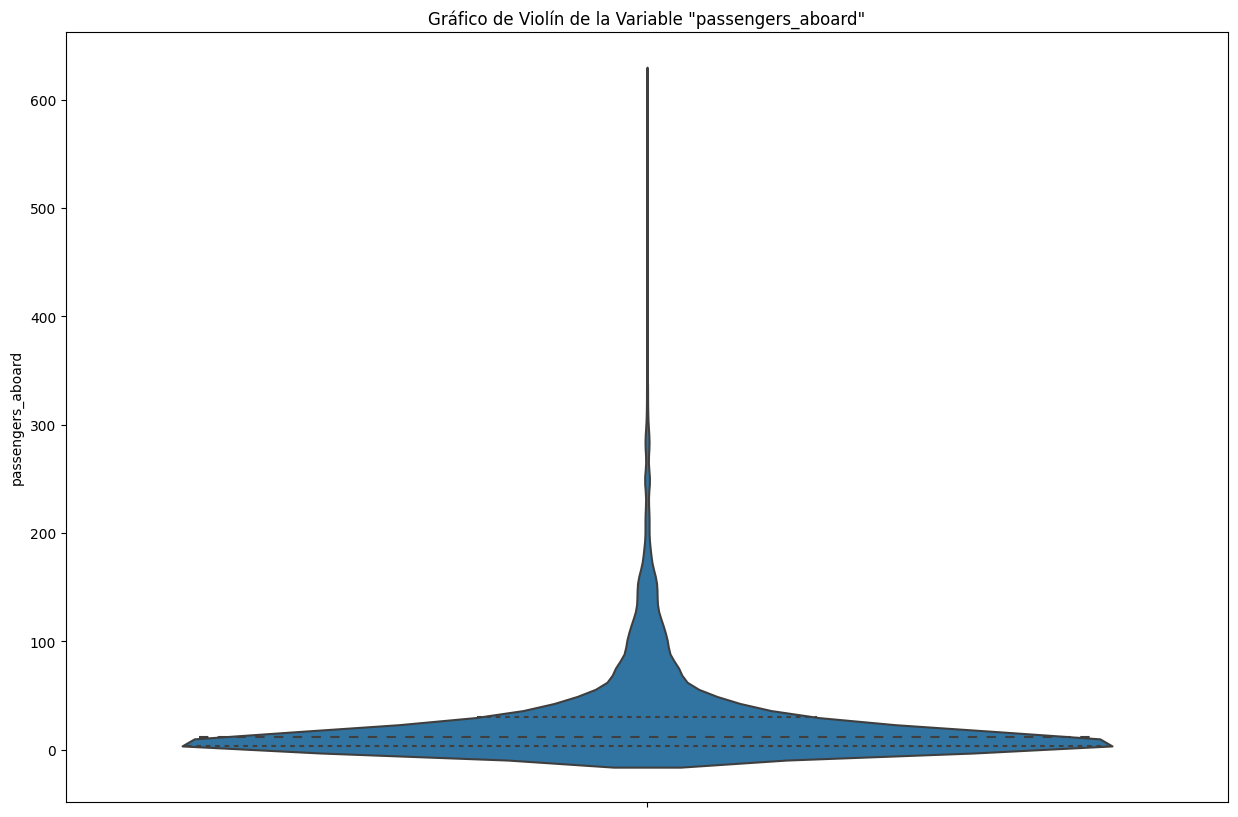

In [127]:
grafico_violin(columna).show()

In [128]:
df_AA_Depurado[df_AA_Depurado[columna] > 400]

year  month  hour state_event country_event  \
2902  1977      3  17.0        None          None   
3341  1985      8  18.0        None         Japan   
4219  1999      7  11.0        None         Japan   

                      airline_operator  \
2902  Pan American World Airways / KLM   
3341                   Japan Air Lines   
4219                All Nippon Airways   

                                              route  \
2902  Tenerife - Las Palmas / Tenerife - Las Palmas   
3341                                  Tokyo - Osaka   
4219                  Tokyo, Japan - Chitose, Japan   

                             aircraft_type  total_aboard  passengers_aboard  \
2902  Boeing B-747-121 / Boeing B-747-206B         644.0              614.0   
3341                     Boeing B-747-SR46         524.0              509.0   
4219                          Boeing B-747         517.0              503.0   

     crew_aboard all_fatalities passengers_fatalities crew_fatalities  \
2902          30            583                   560              23   
3341          15            520                   505              15   
4219          14              1                     0               1   

     all_killed_ground  
2902                 0  
3341                 0  
4219                 0

>Si bien las versiones típicas de Boeing 747, no poseen capacidades tan elavadas de pasajeros, estos números podría estar relacionados con configuraciones muy específicas de una aerolínea o una versión modificada del avión para un propósito particular. Careciendo de otros datos se toma la información de origen como válida y no los podemos considerar como valores atípicos.

In [129]:
df_AA_Depurado[columna].describe()

count    4787.000000
mean       26.877376
std        44.035342
min         0.000000
25%         3.000000
50%        12.000000
75%        30.000000
max       614.000000
Name: passengers_aboard, dtype: float64

#### Columna "crew_aboard"

In [130]:
columna= "crew_aboard"
columna_a_enteros(columna)

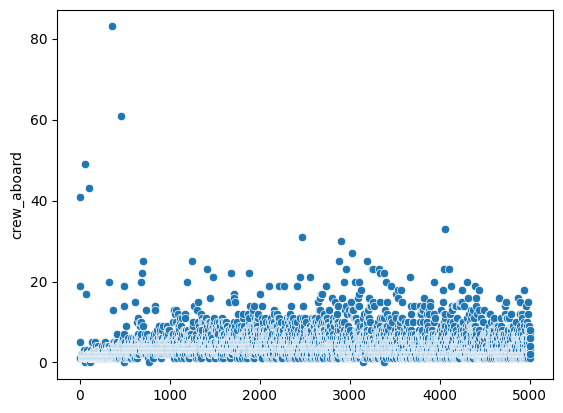

In [131]:
grafico_dispersión(columna)

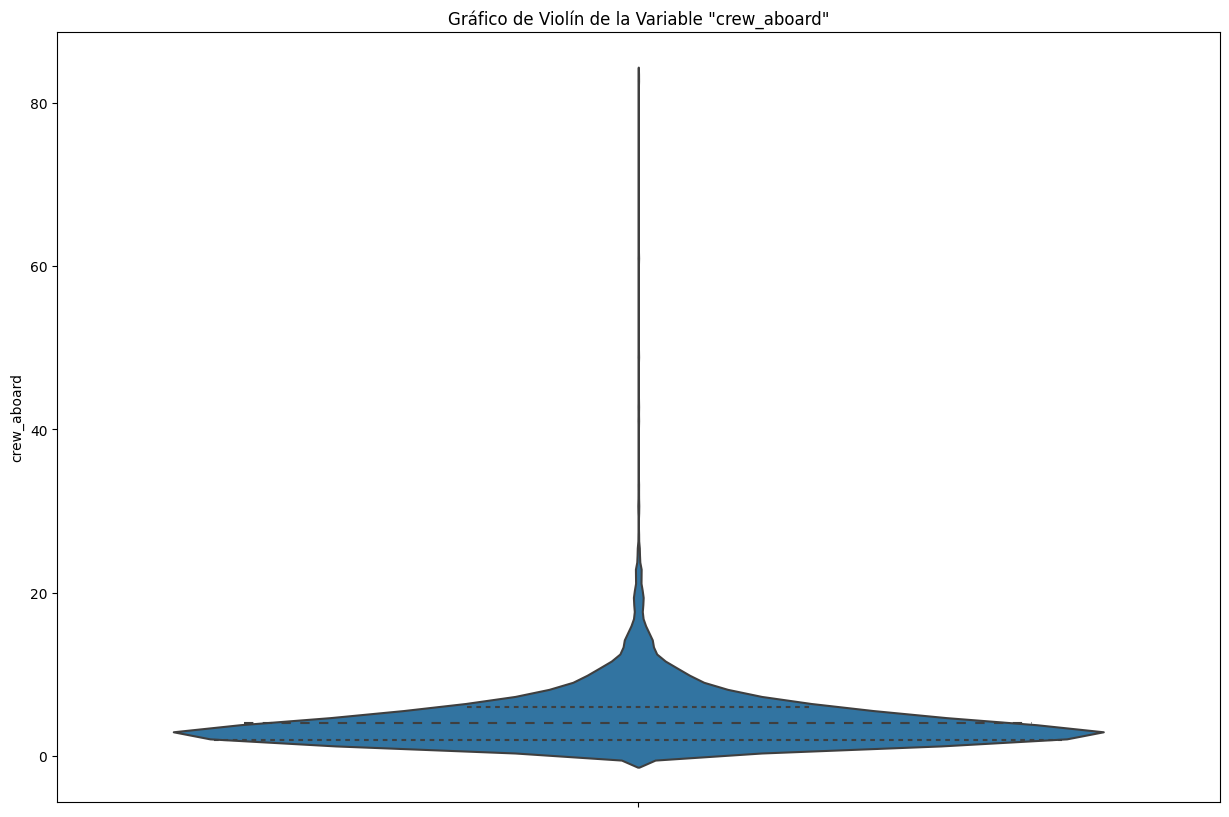

In [132]:
grafico_violin(columna).show()

In [133]:
df_AA_Depurado[df_AA_Depurado[columna] > 30]

year  month  hour state_event  country_event  \
6     1915      3   1.0        None        Belgium   
60    1921      8  17.0        None           None   
102   1925      9   5.0        Ohio  United States   
364   1935      2   NaN        None           None   
462   1937      5  19.0  New Jersey  United States   
2471  1970      3  11.0        None           None   
4057  1996     11  18.0        None          India   

                                  airline_operator  \
6                           Military - German Navy   
60                  Military - Royal Airship Works   
102                           Military - U.S. Navy   
364                             Military - US Navy   
462                     Deutsche Zeppelin Reederei   
2471                          Military - U.S. Navy   
4057  Saudi Arabian Airlines / Kazakhstan Airlines   

                                           route  \
6                                           None   
60                                          None   
102                Lakehurst, NJ - S.t Louis, MO   
364                                         None   
462                   Frankfurt - Lakehurst N.J.   
2471                            Taiwan - Da Nang   
4057  New Delhi - Dhahran / Chimkent - New Delhi   

                                 aircraft_type  total_aboard  \
6                       Zeppelin L-8 (airship)          41.0   
60          Royal Airship Works ZR-2 (airship)          49.0   
102        Dirigible ZR-1 Shenandoah (airship)          43.0   
364   Goodyear-Zeppelin U.S.S. Macon (airship)          83.0   
462                            Zeppelin LZ-129          97.0   
2471                          Lockheed EC-121P          31.0   
4057      Boeing B-747-168B / Ilyushin IL-76TD         349.0   

      passengers_aboard  crew_aboard all_fatalities passengers_fatalities  \
6                   0.0         41.0             17                     0   
60                  0.0         49.0             43                     0   
102                 0.0         43.0             14                     0   
364                 0.0         83.0              2                     0   
462                36.0         61.0             35                    13   
2471                0.0         31.0             23                     0   
4057              316.0         33.0            349                   316   

     crew_fatalities all_killed_ground  
6                 17                 0  
60                43                 1  
102               14                 0  
364                2                 0  
462               22                 1  
2471              23                 0  
4057              33                 0

>Se trata de un zeppeling y de vehículos militares, por lo que es altamente factible sea correcta la información. Careciendo de otros datos se toma la información de origen como válida y no los podemos considerar como valores atípicos.

In [134]:
df_AA_Depurado[columna].describe()

count    4789.000000
mean        4.519524
std         3.758072
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        83.000000
Name: crew_aboard, dtype: float64

#### Columna "all_fatalities"

In [135]:
columna= "all_fatalities"
columna_a_enteros(columna)

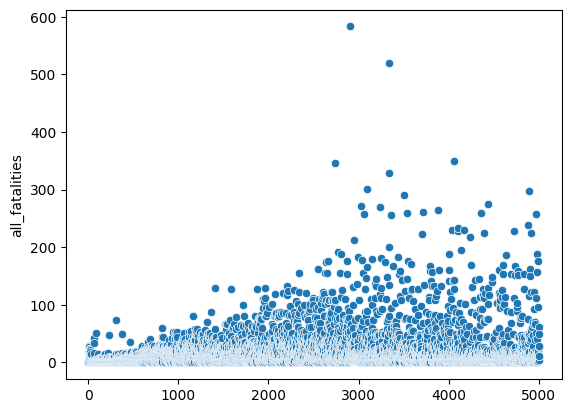

In [136]:
grafico_dispersión(columna)

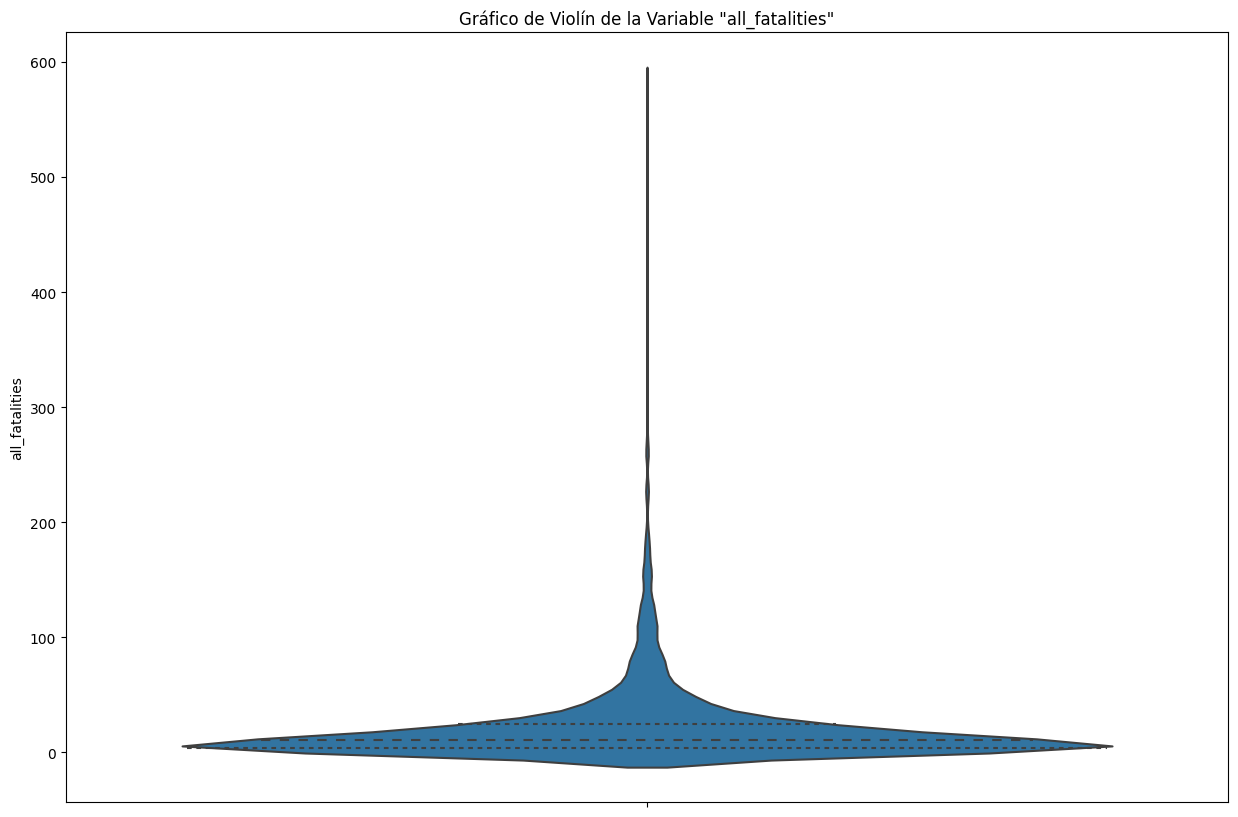

In [137]:
grafico_violin(columna).show()

In [138]:
df_AA_Depurado[df_AA_Depurado[columna] > 200]

year  month  hour    state_event  country_event  \
2737  1974      3  11.0           None         France   
2902  1977      3  17.0           None           None   
2953  1978      1  20.0           None          India   
3024  1979      5  15.0       Illinois  United States   
3056  1979     11  12.0           None     Antarctica   
3093  1980      8  19.0           None   Saudi Arabia   
3244  1983      9  18.0           None         Russia   
3337  1985      6   7.0           None           None   
3341  1985      8  18.0           None          Japan   
3362  1985     12   6.0           None         Canada   
3500  1988      7  10.0           None           Iran   
3533  1988     12  19.0           None           None   
3704  1991      5  23.0           None       Thailand   
3713  1991      7   8.0           None   Saudi Arabia   
3888  1994      4  20.0           None          Japan   
4037  1996      7  20.0       New York  United States   
4057  1996     11  18.0           None          India   
4102  1997      8   1.0           None           None   
4110  1997      9  13.0           None      Indonesia   
4166  1998      9  21.0           None         Canada   
4235  1999     10   1.0  Massachusetts  United States   
4359  2001     11   9.0       New York  United States   
4392  2002      5  15.0           None         Taiwan   
4433  2003      2  17.0           None           Iran   
4729  2009      6   0.0           None         Brazil   
4886  2014      3   2.0           None           None   
4895  2014      7  16.0           None        Ukraine   
4919  2015     10   6.0           None          Egypt   
4969  2018      4   8.0           None        Algeria   

                                  airline_operator  \
2737                        Turkish Airlines (THY)   
2902              Pan American World Airways / KLM   
2953                                     Air India   
3024                             American Airlines   
3056                               Air New Zealand   
3093                        Saudi Arabian Airlines   
3244                               Korean Airlines   
3337                                     Air India   
3341                               Japan Air Lines   
3362                                 Arrow Airways   
3500                                      Iran Air   
3533                    Pan American World Airways   
3704                                     Lauda Air   
3713      Nationair (chartered by Nigeria Airways)   
3888                       China Airlines (Taiwan)   
4037                          Trans World Airlines   
4057  Saudi Arabian Airlines / Kazakhstan Airlines   
4102                               Korean Airlines   
4110                     Garuda Indonesia Airlines   
4166                                      Swissair   
4235                                      EgyptAir   
4359                             American Airlines   
4392                       China Airlines (Taiwan)   
4433  Military - Islamic Revolution's Guards Corps   
4729                                    Air France   
4886                             Malaysia Airlines   
4895                             Malaysia Airlines   
4919                                      Metrojet   
4969                 Military - Algerian Air Force   

                                              route  \
2737                                 Paris - London   
2902  Tenerife - Las Palmas / Tenerife - Las Palmas   
2953                                 Bombay - Dubai   
3024                   Chicago, IL- Los Angeles, CA   
3056                        Auckland - Christchurch   
3093                                Riyadh - Jeddah   
3244                              Anchorage - Seoul   
3337                              Montreal - London   
3341                                  Tokyo - Osaka   
3362                     Gander - Fort Campbell, KY   
3500                           Bandar Abbas - Dubai   
3533          

>Se carece de datos para considerar como valores atípicos estos valores.

In [139]:
df_AA_Depurado[columna].describe()

count    5000.000000
mean       22.294000
std        35.000385
min         0.000000
25%         4.000000
50%        11.000000
75%        25.000000
max       583.000000
Name: all_fatalities, dtype: float64

#### Columna "passengers_fatalities"

In [140]:
columna= "passengers_fatalities"
columna_a_enteros(columna)

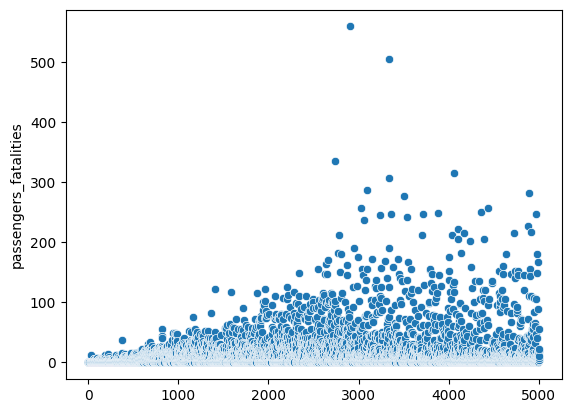

In [141]:
grafico_dispersión(columna)

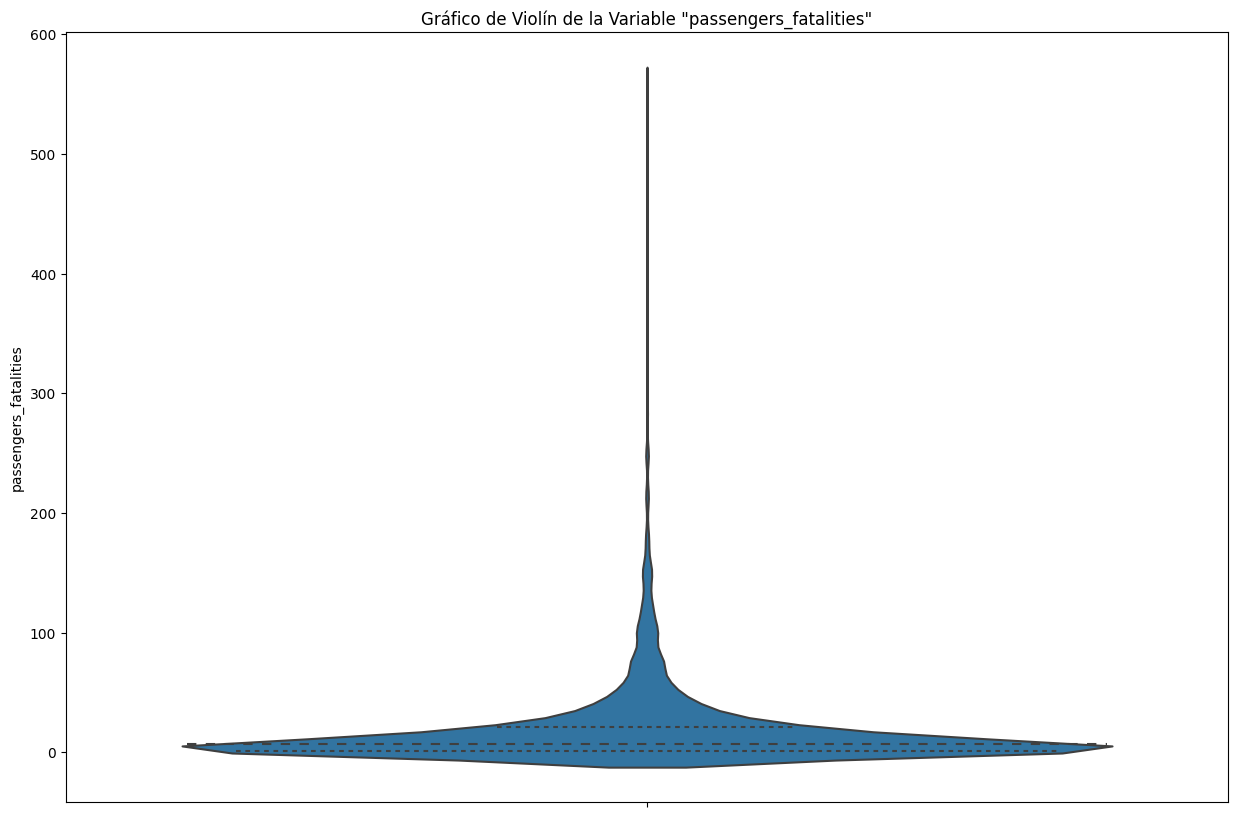

In [142]:
grafico_violin(columna).show()

In [143]:
df_AA_Depurado[df_AA_Depurado[columna] > 250]

year  month  hour state_event  country_event  \
2737  1974      3  11.0        None         France   
2902  1977      3  17.0        None           None   
3024  1979      5  15.0    Illinois  United States   
3093  1980      8  19.0        None   Saudi Arabia   
3337  1985      6   7.0        None           None   
3341  1985      8  18.0        None          Japan   
3500  1988      7  10.0        None           Iran   
4057  1996     11  18.0        None          India   
4359  2001     11   9.0    New York  United States   
4433  2003      2  17.0        None           Iran   
4895  2014      7  16.0        None        Ukraine   

                                  airline_operator  \
2737                        Turkish Airlines (THY)   
2902              Pan American World Airways / KLM   
3024                             American Airlines   
3093                        Saudi Arabian Airlines   
3337                                     Air India   
3341                               Japan Air Lines   
3500                                      Iran Air   
4057  Saudi Arabian Airlines / Kazakhstan Airlines   
4359                             American Airlines   
4433  Military - Islamic Revolution's Guards Corps   
4895                             Malaysia Airlines   

                                              route  \
2737                                 Paris - London   
2902  Tenerife - Las Palmas / Tenerife - Las Palmas   
3024                   Chicago, IL- Los Angeles, CA   
3093                                Riyadh - Jeddah   
3337                              Montreal - London   
3341                                  Tokyo - Osaka   
3500                           Bandar Abbas - Dubai   
4057     New Delhi - Dhahran / Chimkent - New Delhi   
4359  New York City - Santo Domingo, Dominican Rep.   
4433                               Zahedan - Kerman   
4895                       Amsterdam - Kuala Lumpur   

                             aircraft_type  total_aboard  passengers_aboard  \
2737            McDonnell Douglas DC-10-10         346.0              335.0   
2902  Boeing B-747-121 / Boeing B-747-206B         644.0              614.0   
3024            McDonnell Douglas DC-10-10         271.0              258.0   
3093             Lockheed 1011-200 TriStar         301.0              287.0   
3337                     Boeing B-747-237B         329.0              307.0   
3341                     Boeing B-747-SR46         524.0              509.0   
3500                     Airbus A300B2-203         290.0              278.0   
4057  Boeing B-747-168B / Ilyushin IL-76TD         349.0              316.0   
4359                     Airbus A-300-605R         260.0              251.0   
4433                      Ilyushin Il-76MD         275.0              257.0   
4895                      Boeing 777-2H6ER         298.0              283.0   

      crew_aboard  all_fatalities  passengers_fatalities crew_fatalities  \
2737         11.0           346.0                  335.0              11   
2902         30.0           583.0                  560.0              23   
3024         13.0           271.0                  258.0              13   
3093         14.0           301.0                  287.0              14   
3337         22.0           329.0                  307.0              22   
3341         15.0           520.0                  505.0              15   
3500         12.0           290.0                  278.0              12   
4057         33.0           349.0                  316.0              33   
4359          9.0           260.0                  251.0               9   
4433         18.0           275.0                  257.0              18   
4895         15.0           298.0                  283.0              15   

     all_killed_ground  
2737                 0  
2902                 0  
3024                 2  
3093                 0  
3337                 0  
3341                 0  
3500      

>Sin otra información se toma la información como correcta, descartando se traten de valores atípicos.

#### Columna "crew_fatalities"

In [144]:
columna= "crew_fatalities"
columna_a_enteros(columna)

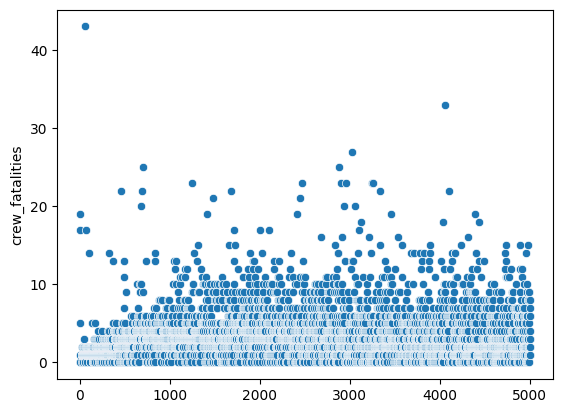

In [145]:
grafico_dispersión(columna)

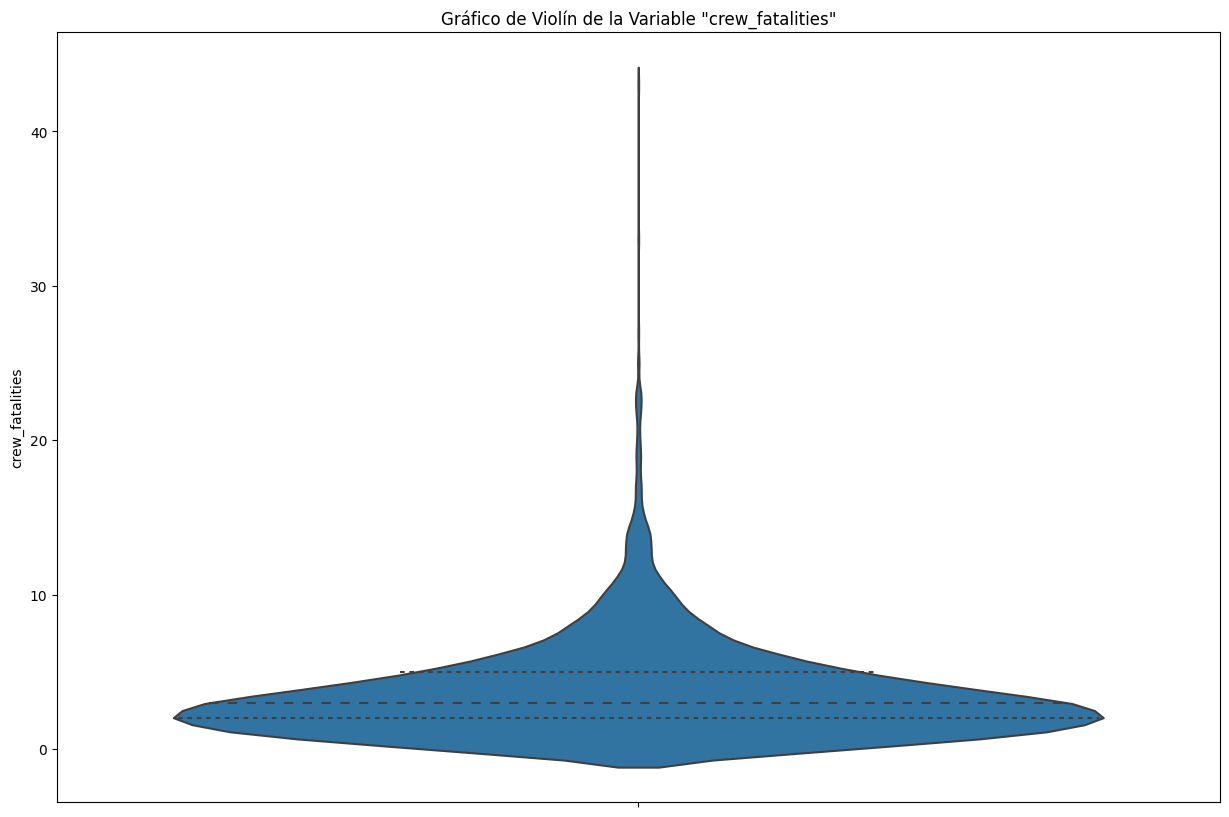

In [146]:
grafico_violin(columna).show()

In [147]:
df_AA_Depurado[df_AA_Depurado[columna] > 25]

year  month  hour state_event country_event  \
60    1921      8  17.0        None          None   
3027  1979      6  11.0        None         India   
4057  1996     11  18.0        None         India   

                                  airline_operator  \
60                  Military - Royal Airship Works   
3027                   Military - Indian Air Force   
4057  Saudi Arabian Airlines / Kazakhstan Airlines   

                                           route  \
60                                          None   
3027                                        None   
4057  New Delhi - Dhahran / Chimkent - New Delhi   

                             aircraft_type  total_aboard  passengers_aboard  \
60      Royal Airship Works ZR-2 (airship)          49.0                0.0   
3027          Hindustan Aeronautics 748-2M          27.0                0.0   
4057  Boeing B-747-168B / Ilyushin IL-76TD         349.0              316.0   

      crew_aboard  all_fatalities  passengers_fatalities  crew_fatalities  \
60           49.0            43.0                    0.0             43.0   
3027         27.0            27.0                    0.0             27.0   
4057         33.0           349.0                  316.0             33.0   

     all_killed_ground  
60                   1  
3027                 0  
4057                 0

>Sin otra información,sobretodo tratándose casi todos ellos de aviones militares, se toma la información como correcta, descartando se traten de valores atípicos.

In [148]:
df_AA_Depurado[columna].describe()

count    4773.000000
mean        3.587262
std         3.177315
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        43.000000
Name: crew_fatalities, dtype: float64

#### Columna "all_killed_ground"

In [149]:
columna= "all_killed_ground"
columna_a_enteros(columna)

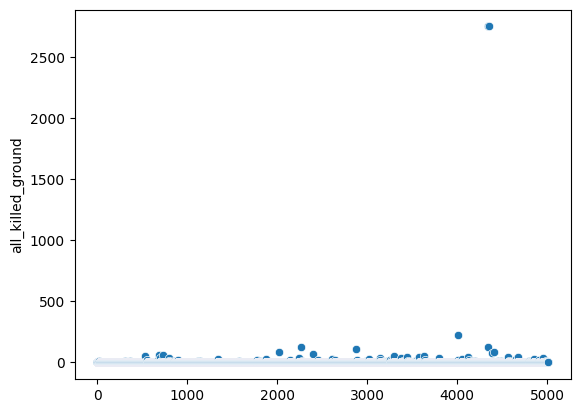

In [150]:
grafico_dispersión(columna)

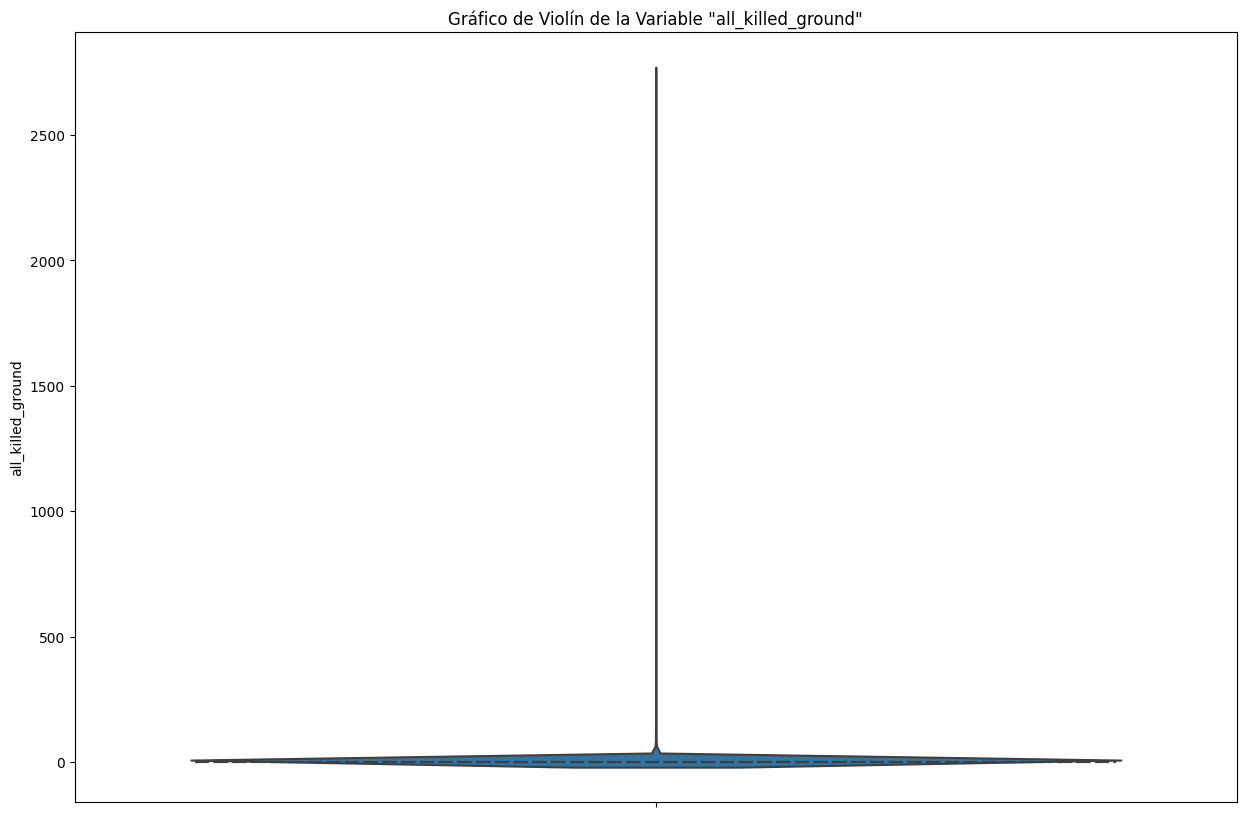

In [151]:
grafico_violin(columna).show()

In [152]:
df_AA_Depurado[df_AA_Depurado[columna] > 100]

year  month  hour state_event  country_event       airline_operator  \
2259  1966     12  19.0        None        Vietnam      Flying Tiger Line   
2877  1976     10  13.0        None        Bolivia  Lloyd Aéreo Boliviano   
4004  1996      1  12.0        None          Zaire            African Air   
4345  2001      9   9.0        None           None      American Airlines   
4346  2001      9   8.0    New York  United States      American Airlines   
4347  2001      9   9.0    New York  United States       United Air Lines   

                              route       aircraft_type  total_aboard  \
2259                           None  Canadair CL-44D4-1           4.0   
2877              Santa Cruz - Viru     Boeing B-707-31           3.0   
4004             Kinshasa - Kahemba      Antonov AN-32B           6.0   
4345  Washington D.C. - Los Angeles    Boeing B-757-223          64.0   
4346           Boston - Los Angeles    Boeing 767-223ER          92.0   
4347           Boston - Los Angeles    Boeing B-767-222          65.0   

      passengers_aboard  crew_aboard  all_fatalities  passengers_fatalities  \
2259                0.0          4.0             4.0                    0.0   
2877                0.0          3.0             3.0                    0.0   
4004                0.0          6.0             2.0                    0.0   
4345               58.0          6.0            64.0                   58.0   
4346               81.0         11.0            92.0                   81.0   
4347               56.0          9.0            65.0                   56.0   

      crew_fatalities  all_killed_ground  
2259              4.0              125.0  
2877              3.0              113.0  
4004              2.0              225.0  
4345              6.0              125.0  
4346             11.0             2750.0  
4347              9.0             2750.0

>Sin otra información se toma la información como correcta, descartando se traten de valores atípicos.

In [153]:
df_AA_Depurado[columna].describe()

count    4964.000000
mean        1.718372
std        55.495544
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      2750.000000
Name: all_killed_ground, dtype: float64

## Correlaciones de variables

In [154]:
columnas_numericas = ['total_aboard', 'passengers_aboard', 'crew_aboard', 'all_fatalities', 'passengers_fatalities', 'crew_fatalities', 'all_killed_ground']

correlacion_pearson = df_AA_Depurado[columnas_numericas].corr()

print(correlacion_pearson)

                       total_aboard  passengers_aboard  crew_aboard  \
total_aboard               1.000000           0.997487     0.568893   
passengers_aboard          0.997487           1.000000     0.510741   
crew_aboard                0.568893           0.510741     1.000000   
all_fatalities             0.739646           0.738965     0.441561   
passengers_fatalities      0.746712           0.747417     0.395682   
crew_fatalities            0.320119           0.274408     0.720937   
all_killed_ground          0.020327           0.018833     0.032121   

                       all_fatalities  passengers_fatalities  crew_fatalities  \
total_aboard                 0.739646               0.746712         0.320119   
passengers_aboard            0.738965               0.747417         0.274408   
crew_aboard                  0.441561               0.395682         0.720937   
all_fatalities               1.000000               0.992972         0.572466   
passengers_fatalities     

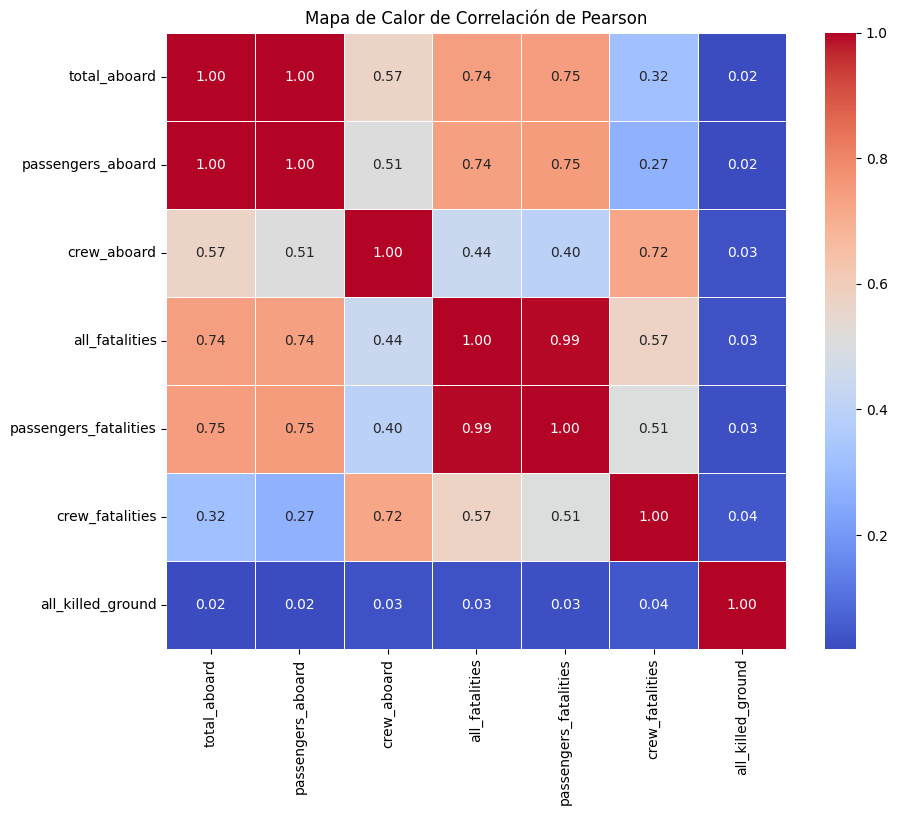

In [155]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion_pearson, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor de Correlación de Pearson")
plt.show()

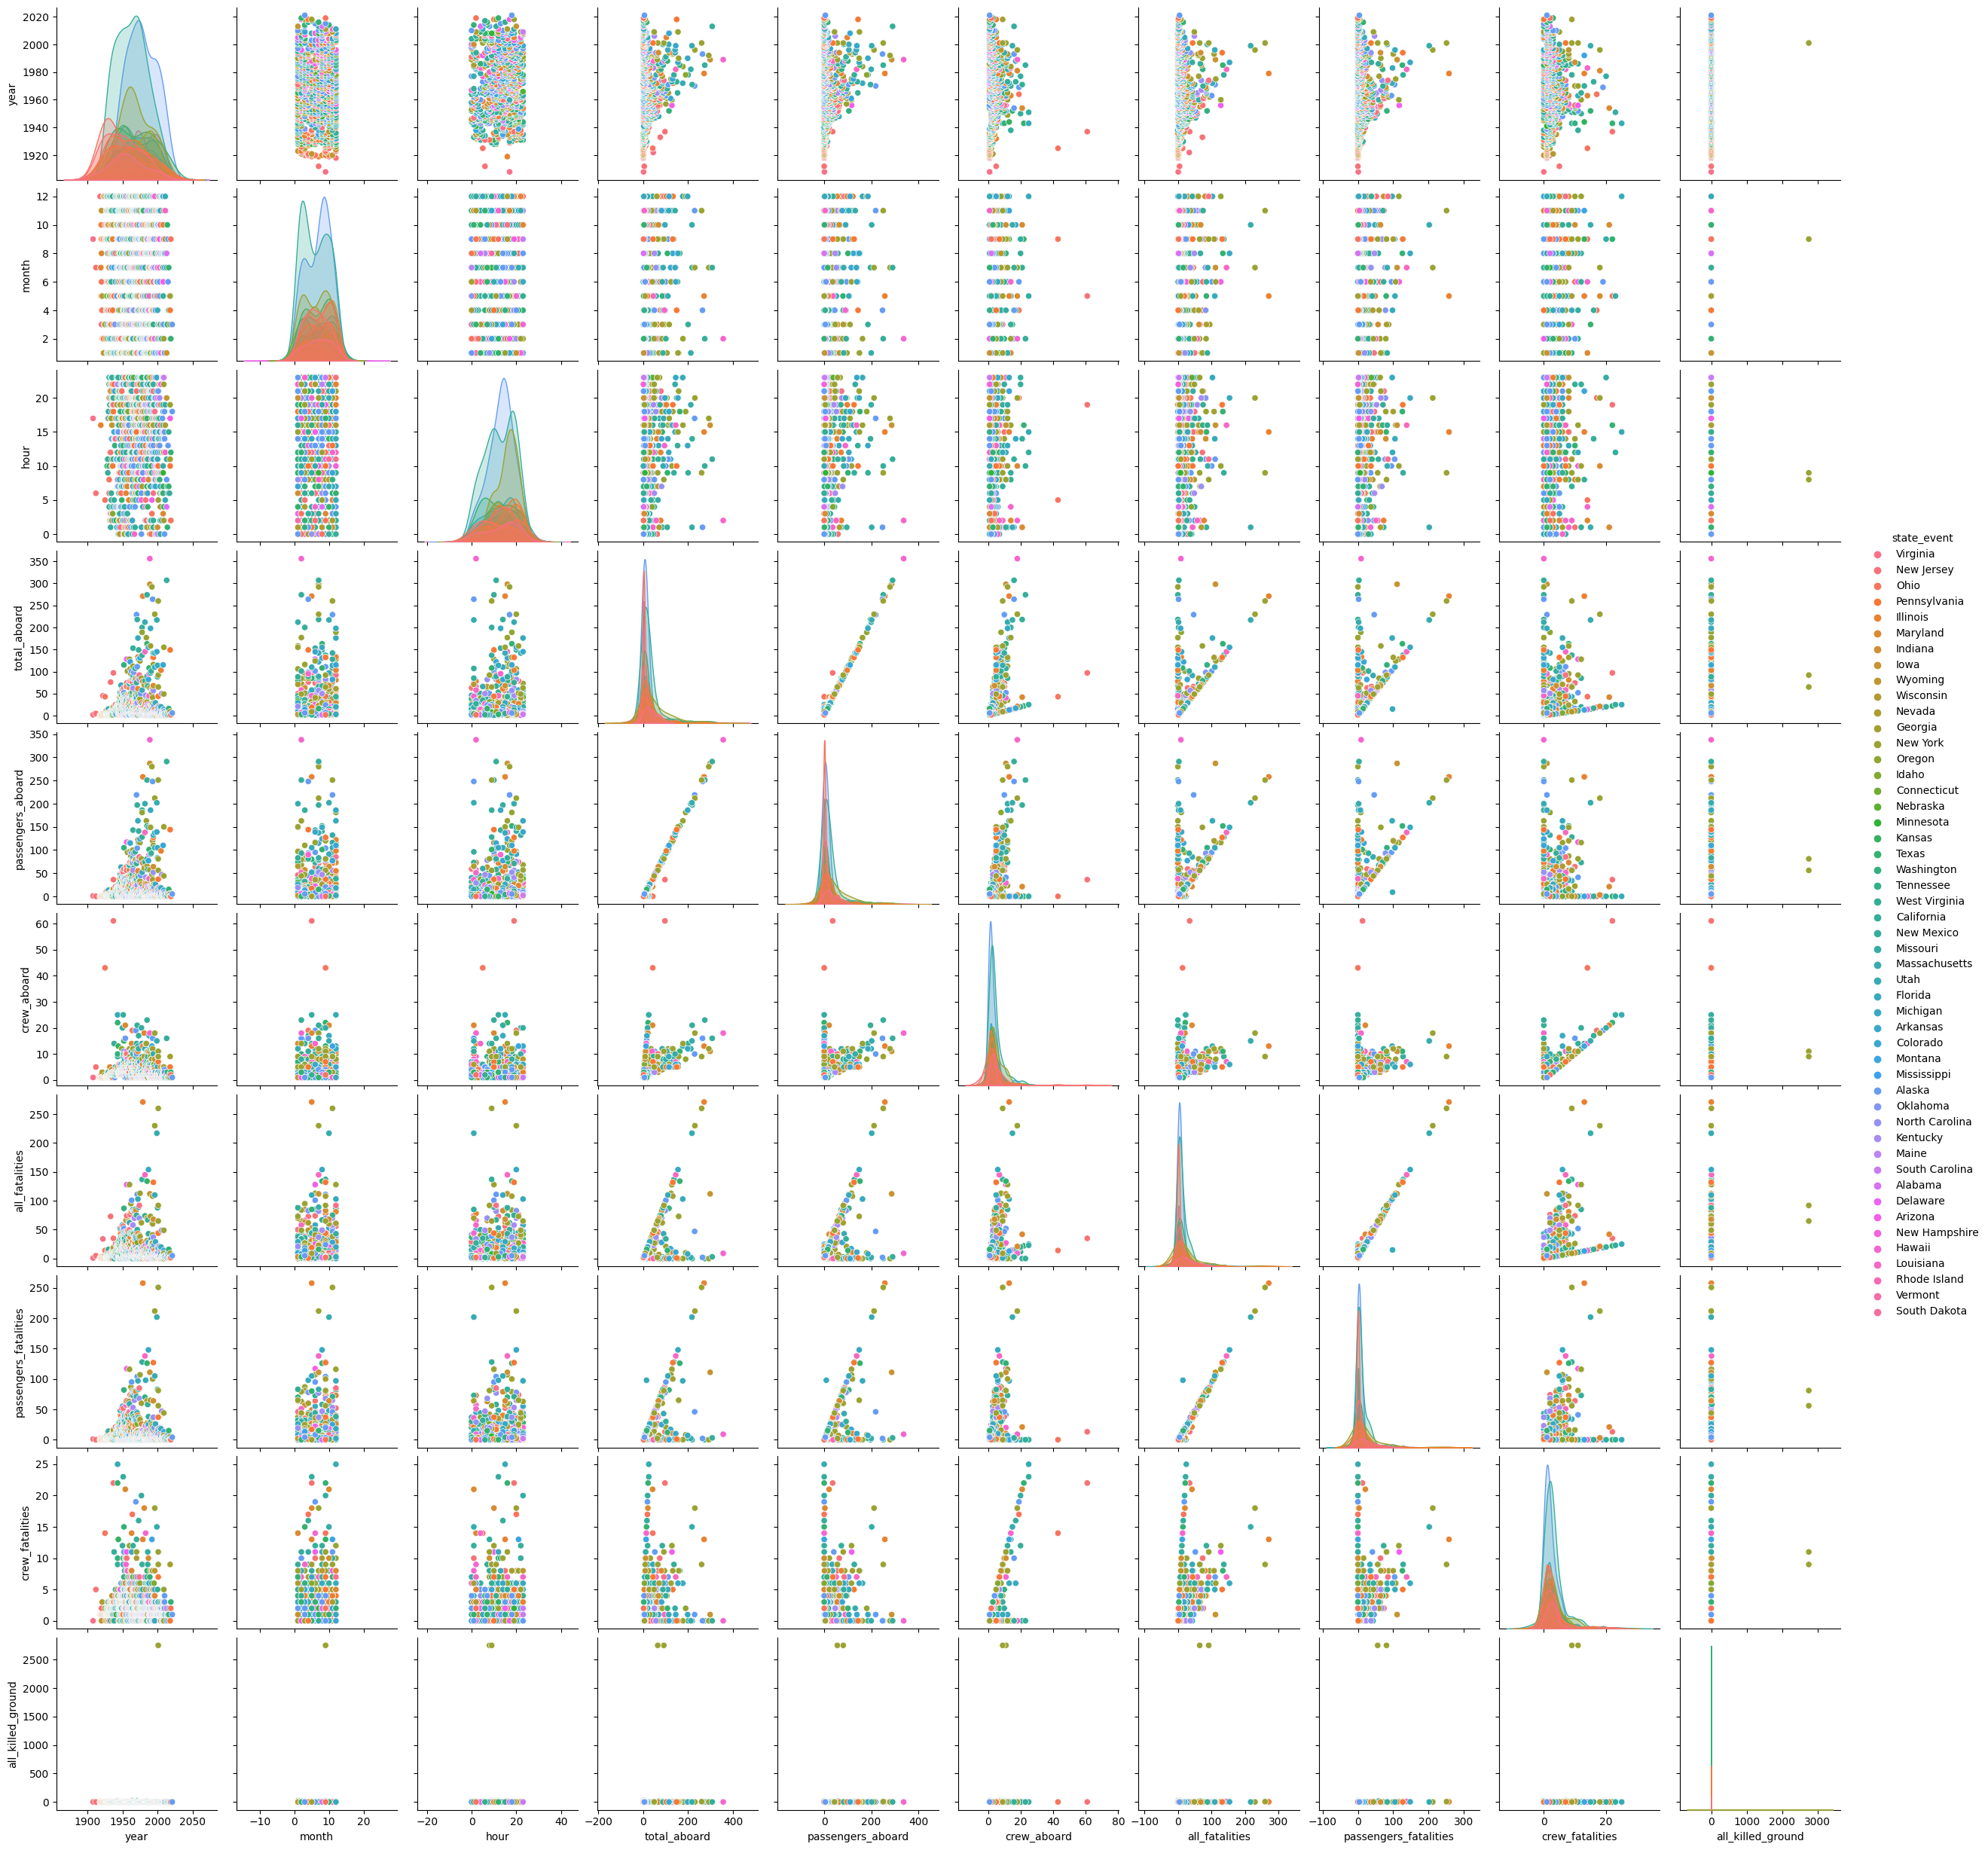

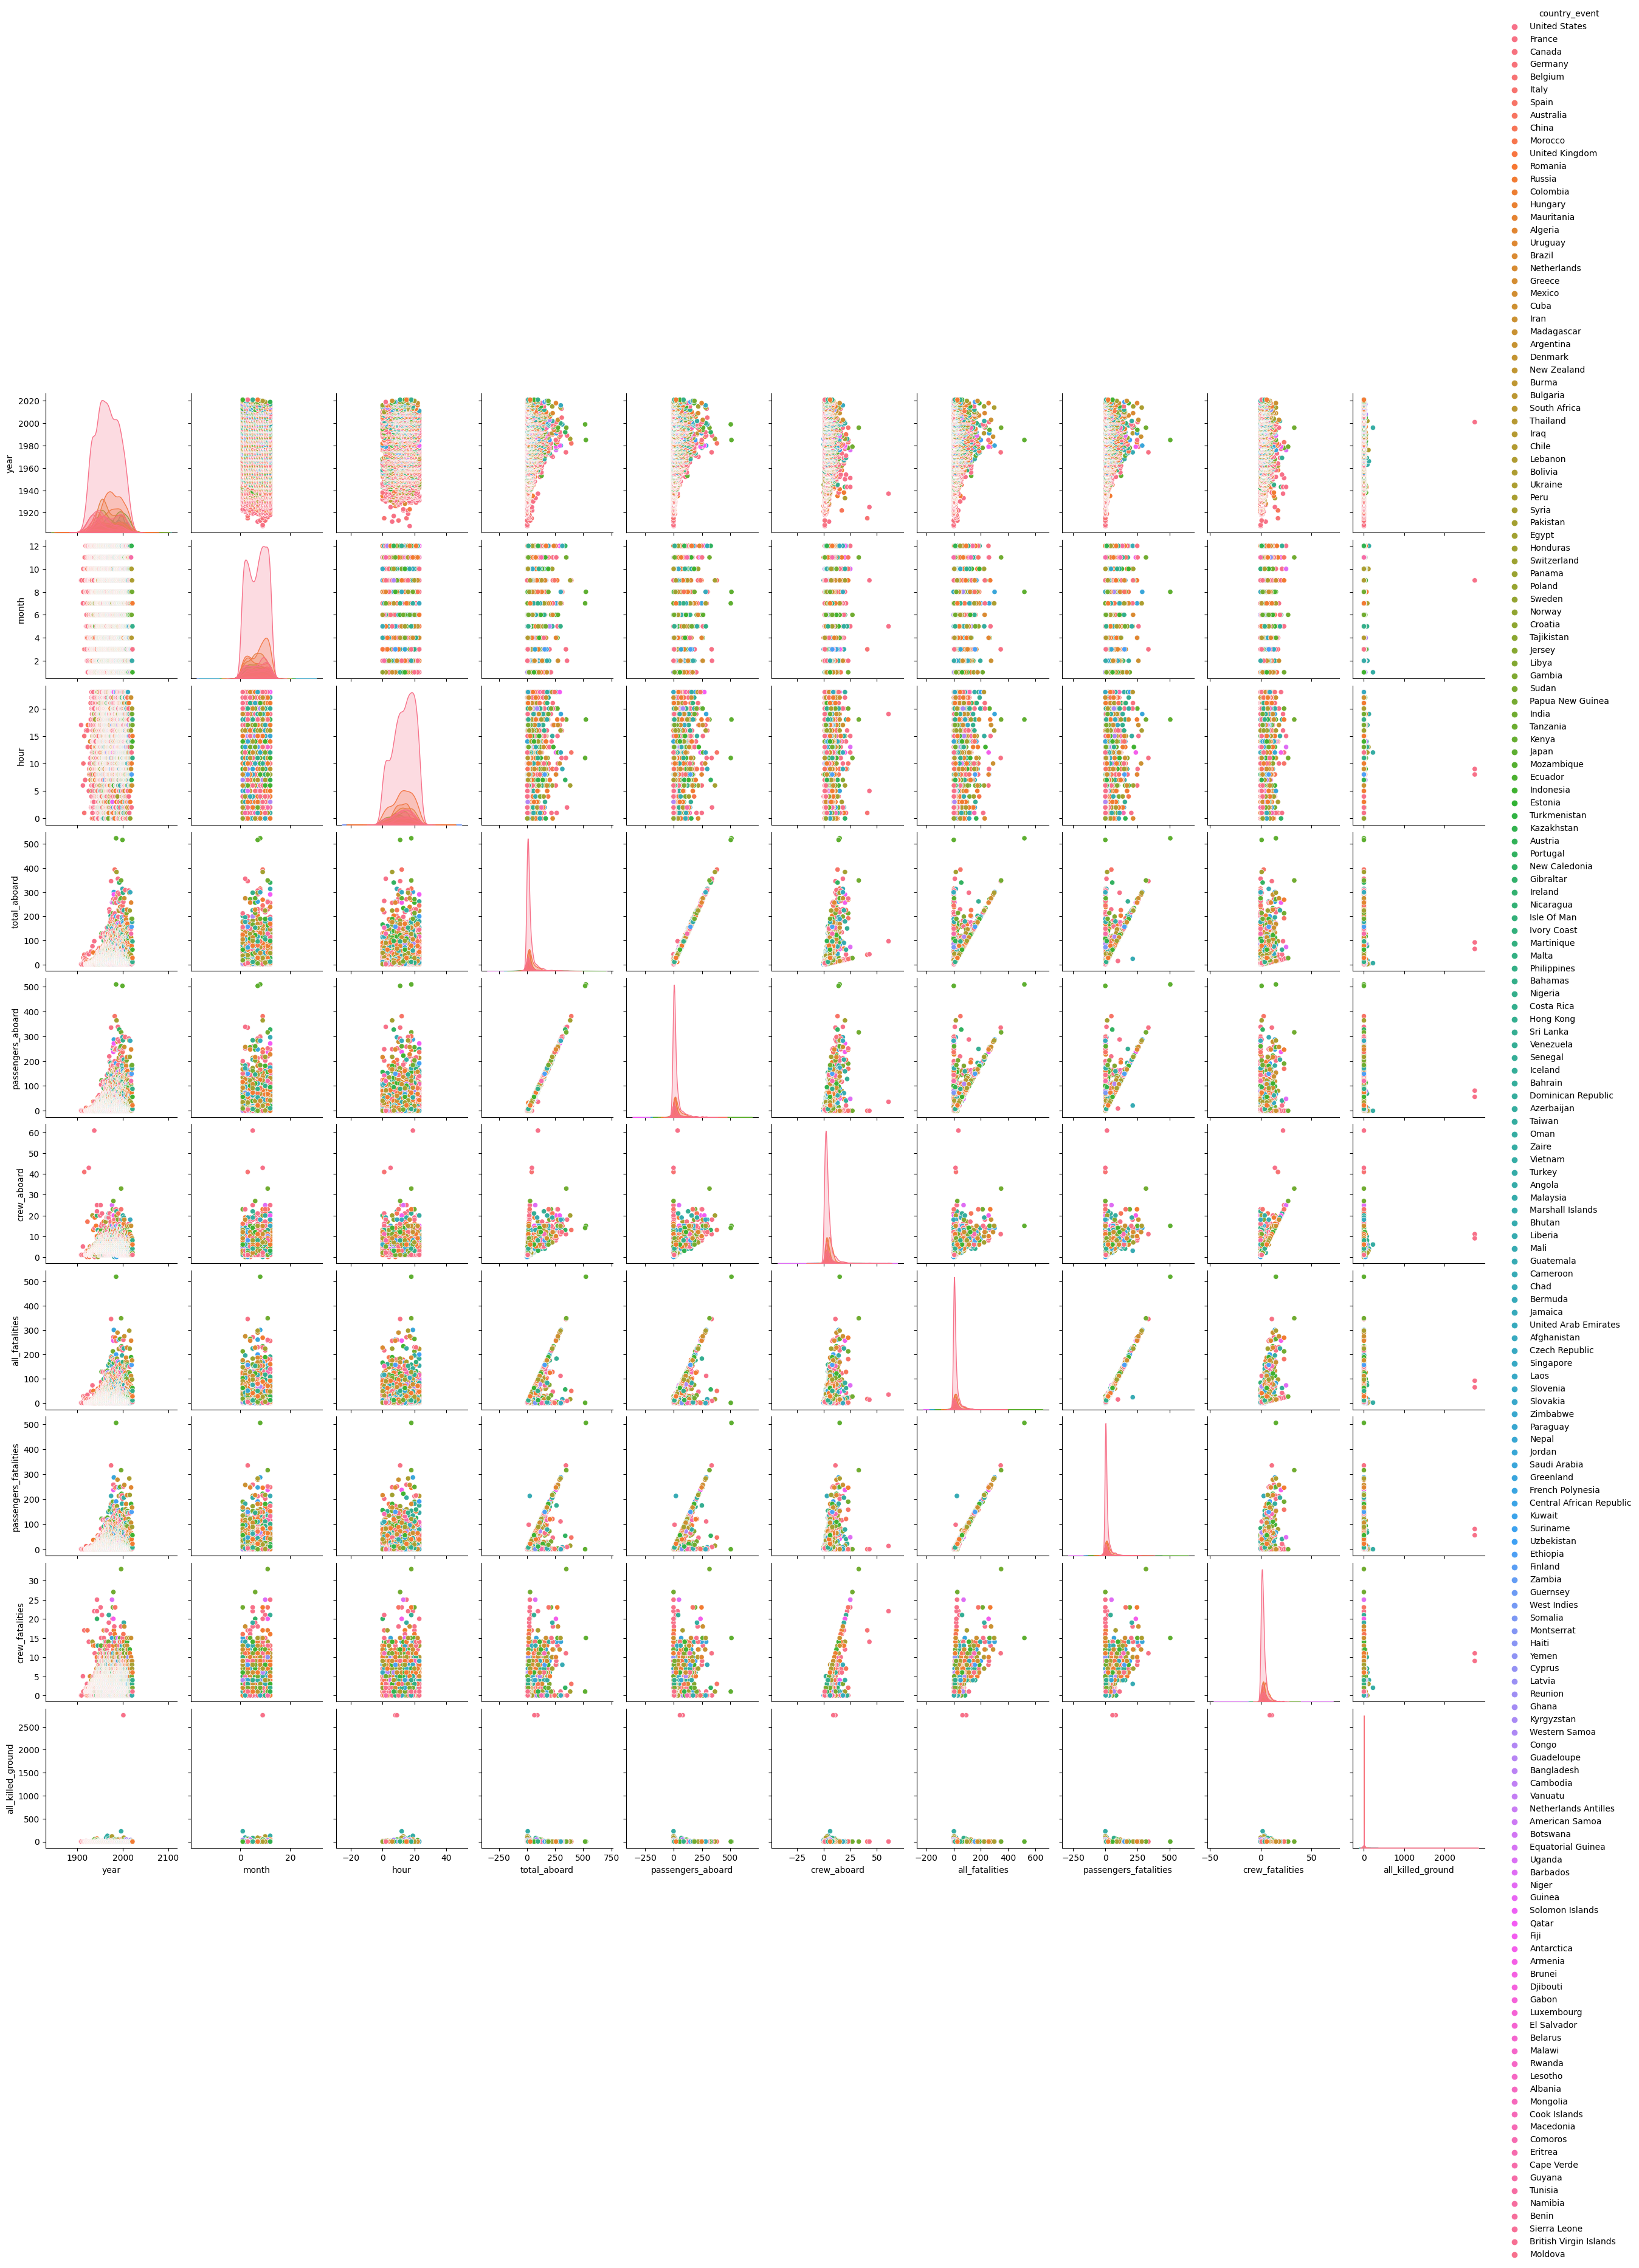

In [156]:
categoricas = ['state_event', 'country_event']
for elemento in categoricas:
    sns.pairplot(df_AA_Depurado, hue=elemento)
    plt.show()

## Grabación del Dataframe CSV y MySQL

### Exportación a CSV

In [158]:
df_AA_Depurado.to_csv('accidentes_aereos_para_dashboar.csv', index=False, sep = ';')

### Exportación a MySQL

In [159]:
# Se importa la librería
import mysql.connector

# Se establece la conexión a MySQL
conexion = mysql.connector.connect(
   host='localhost',
   user='root',
   password='Ch1235813',
)

# Se instanciamos el cursor y se crea la base de datos 'accidentes_aereos_para_dashboard"' si no existe
cursor = conexion.cursor()
cursor.execute("CREATE DATABASE IF NOT EXISTS accidentes_aereos_para_dashboard")
cursor.execute("USE accidentes_aereos_para_dashboard")

# Se crea la tabla 'accidentes_aereos'
cursor.execute('''
    CREATE TABLE IF NOT EXISTS accidentes_aereos (
        year INT,
        month INT,
        hour INT,
        state_event VARCHAR(250),
        country_event VARCHAR(250),
        airline_operator VARCHAR(250),
        route VARCHAR(250),
        aircraft_type VARCHAR(250),
        total_aboard INT,
        passengers_aboard INT,
        crew_aboard INT,
        all_fatalities INT,
        passengers_fatalities INT,
        crew_fatalities INT,
        all_killed_ground INT
    )
''')

# Se definen los datos a utilizar a utilizar
datos = df_AA_Depurado.to_dict(orient='records')

# Se escribe la consulta SQL para insertar registro a registro
insert_query = '''
    INSERT INTO accidentes_aereos
    (year, month, hour, state_event, country_event, airline_operator, route, aircraft_type, total_aboard,
    passengers_aboard, crew_aboard, all_fatalities, passengers_fatalities, crew_fatalities, all_killed_ground)
    VALUES
    (%(year)s, %(month)s, %(hour)s, %(state_event)s, %(country_event)s, %(airline_operator)s, %(route)s,
    %(aircraft_type)s, %(total_aboard)s, %(passengers_aboard)s, %(crew_aboard)s, %(all_fatalities)s,
    %(passengers_fatalities)s, %(crew_fatalities)s, %(all_killed_ground)s)
'''

# Se ejecuta la inserción de datos para cada registro
i = 0
for fila in datos:
    # Se reemplazan los valores NaN por None en el diccionario
    fila = {key: None if pd.isna(value) else value for key, value in fila.items()}
    cursor.execute(insert_query, fila)
    i += 1

# Se "commitean" los cambios en la base de datos
conexion.commit()

# Se cierra la conexión
cursor.close()
conexion.close()
print(f"Registros Grabados: {i}")

Registros Grabados: 5008
